In [389]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **SIGAI MUMBAI WEATHER AND AQI CORRELATION ANALYSIS**

##MUMBAI WEATHER ANALYSIS

In [390]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [391]:
data1 = pd.read_csv('/content/drive/MyDrive/datasets/mumbai 2023-01-01 to 2023-04-30.csv')
data1.head(6)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,mumbai,01-01-2023,28.0,18.7,23.6,27.9,18.7,23.6,14.6,58.5,...,18.4,8,10,2023-01-01T07:11:44,2023-01-01T18:12:25,0.30,Clear,Clear conditions throughout the day.,clear-day,"VABB,VAJJ,43003099999,43057099999,43060099999"
1,mumbai,02-01-2023,30.6,18.7,24.9,30.5,18.7,25.0,16.2,60.4,...,18.4,8,10,2023-01-02T07:12:05,2023-01-02T18:13:01,0.34,Clear,Clear conditions throughout the day.,clear-day,"43058099999,VABB,VAJJ,43003099999,43057099999,..."
2,mumbai,03-01-2023,29.4,19.7,24.7,30.0,19.7,24.8,17.2,64.3,...,18.2,8,10,2023-01-03T07:12:24,2023-01-03T18:13:38,0.37,Clear,Clear conditions throughout the day.,clear-day,"43058099999,VABB,VAJJ,43003099999,43057099999,..."
3,mumbai,04-01-2023,29.0,19.3,24.5,29.7,19.3,24.6,16.8,63.5,...,17.9,8,10,2023-01-04T07:12:42,2023-01-04T18:14:16,0.41,Clear,Clear conditions throughout the day.,clear-day,"43058099999,VABB,VAJJ,43003099999,43057099999,..."
4,mumbai,05-01-2023,30.0,21.8,25.8,31.3,21.8,26.2,17.5,60.8,...,17.8,8,10,2023-01-05T07:12:59,2023-01-05T18:14:53,0.44,Clear,Clear conditions throughout the day.,clear-day,"43058099999,VABB,VAJJ,43003099999,43057099999,..."
5,mumbai,06-01-2023,32.1,23.3,27.6,32.4,23.3,28.1,18.4,58.6,...,17.9,8,10,2023-01-06T07:13:14,2023-01-06T18:15:31,0.48,Clear,Clear conditions throughout the day.,clear-day,"43058099999,VABB,VAJJ,43003099999,43057099999,..."


In [392]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              120 non-null    object 
 1   datetime          120 non-null    object 
 2   tempmax           120 non-null    float64
 3   tempmin           120 non-null    float64
 4   temp              120 non-null    float64
 5   feelslikemax      120 non-null    float64
 6   feelslikemin      120 non-null    float64
 7   feelslike         120 non-null    float64
 8   dew               120 non-null    float64
 9   humidity          120 non-null    float64
 10  precip            120 non-null    float64
 11  precipprob        120 non-null    int64  
 12  precipcover       120 non-null    float64
 13  preciptype        9 non-null      object 
 14  snow              120 non-null    int64  
 15  snowdepth         0 non-null      float64
 16  windgust          120 non-null    float64
 1

In [393]:
data1['datetime'] = pd.to_datetime(data1['datetime'])
data1

<ipython-input-393-3524c0b02f72>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data1['datetime'] = pd.to_datetime(data1['datetime'])


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,mumbai,2023-01-01,28.0,18.7,23.6,27.9,18.7,23.6,14.6,58.5,...,18.4,8,10,2023-01-01T07:11:44,2023-01-01T18:12:25,0.30,Clear,Clear conditions throughout the day.,clear-day,"VABB,VAJJ,43003099999,43057099999,43060099999"
1,mumbai,2023-02-01,30.6,18.7,24.9,30.5,18.7,25.0,16.2,60.4,...,18.4,8,10,2023-01-02T07:12:05,2023-01-02T18:13:01,0.34,Clear,Clear conditions throughout the day.,clear-day,"43058099999,VABB,VAJJ,43003099999,43057099999,..."
2,mumbai,2023-03-01,29.4,19.7,24.7,30.0,19.7,24.8,17.2,64.3,...,18.2,8,10,2023-01-03T07:12:24,2023-01-03T18:13:38,0.37,Clear,Clear conditions throughout the day.,clear-day,"43058099999,VABB,VAJJ,43003099999,43057099999,..."
3,mumbai,2023-04-01,29.0,19.3,24.5,29.7,19.3,24.6,16.8,63.5,...,17.9,8,10,2023-01-04T07:12:42,2023-01-04T18:14:16,0.41,Clear,Clear conditions throughout the day.,clear-day,"43058099999,VABB,VAJJ,43003099999,43057099999,..."
4,mumbai,2023-05-01,30.0,21.8,25.8,31.3,21.8,26.2,17.5,60.8,...,17.8,8,10,2023-01-05T07:12:59,2023-01-05T18:14:53,0.44,Clear,Clear conditions throughout the day.,clear-day,"43058099999,VABB,VAJJ,43003099999,43057099999,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,mumbai,2023-04-26,32.1,28.0,29.5,36.3,31.9,33.9,23.6,71.3,...,24.5,10,60,2023-04-26T06:14:13,2023-04-26T18:59:11,0.20,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"43058099999,VABB,VAJJ,43003099999,43057099999,..."
116,mumbai,2023-04-27,32.8,27.3,29.5,36.9,30.0,33.4,23.1,68.8,...,25.0,10,30,2023-04-27T06:13:35,2023-04-27T18:59:29,0.23,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"43058099999,VABB,VAJJ,43003099999,43057099999,..."
117,mumbai,2023-04-28,31.7,27.2,29.4,37.5,30.2,33.3,23.0,68.8,...,24.6,10,10,2023-04-28T06:12:58,2023-04-28T18:59:48,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"43058099999,VABB,VAJJ,43003099999,43057099999,..."
118,mumbai,2023-04-29,32.8,26.9,29.5,36.1,29.6,32.6,22.2,65.5,...,25.8,10,10,2023-04-29T06:12:21,2023-04-29T19:00:08,0.29,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"VABB,VAJJ,43003099999,43057099999,43060099999"


In [394]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              120 non-null    object        
 1   datetime          120 non-null    datetime64[ns]
 2   tempmax           120 non-null    float64       
 3   tempmin           120 non-null    float64       
 4   temp              120 non-null    float64       
 5   feelslikemax      120 non-null    float64       
 6   feelslikemin      120 non-null    float64       
 7   feelslike         120 non-null    float64       
 8   dew               120 non-null    float64       
 9   humidity          120 non-null    float64       
 10  precip            120 non-null    float64       
 11  precipprob        120 non-null    int64         
 12  precipcover       120 non-null    float64       
 13  preciptype        9 non-null      object        
 14  snow              120 non-

In [395]:
data1.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,31.860000,23.516667,27.729167,33.527500,23.972500,28.722500,17.301667,55.906667,0.272500,4.166667,...,19.82000,272.825000,1011.480000,20.087500,3.160833,256.432500,22.148333,8.991667,17.933333,0.474000
std,2.806158,2.958206,2.546786,4.023961,3.675812,3.534546,4.242799,12.955040,2.074291,20.066416,...,3.50588,81.968127,2.325366,17.793718,0.577636,31.401791,2.712684,0.793840,16.564990,0.287634
min,25.400000,17.000000,21.800000,25.400000,17.000000,21.800000,8.000000,24.800000,0.000000,0.000000,...,13.10000,8.100000,1005.500000,0.000000,2.100000,149.000000,12.900000,7.000000,5.000000,0.000000
25%,30.225000,21.700000,26.400000,30.900000,21.700000,26.700000,14.175000,45.150000,0.000000,0.000000,...,17.80000,266.875000,1010.000000,4.675000,2.800000,226.825000,19.600000,8.000000,10.000000,0.250000
50%,31.700000,23.850000,27.700000,33.000000,23.850000,28.500000,17.150000,58.250000,0.000000,0.000000,...,19.15000,298.050000,1011.500000,14.900000,3.100000,262.300000,22.700000,9.000000,10.000000,0.465000
75%,34.000000,26.000000,29.425000,36.300000,26.000000,31.250000,21.025000,66.825000,0.000000,0.000000,...,21.70000,319.325000,1013.225000,30.325000,3.500000,283.550000,24.500000,10.000000,15.000000,0.720000
max,39.000000,28.900000,33.200000,43.600000,32.100000,36.100000,25.500000,81.800000,17.200000,100.000000,...,38.90000,355.400000,1016.000000,77.900000,5.500000,303.800000,26.100000,10.000000,100.000000,0.980000


In [396]:
data1.shape

(120, 33)

##HANDLING NULL VALUES IN WEATHER DATASET

In [397]:
data1.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          111
snow                  0
snowdepth           120
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk            0
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

<Axes: >

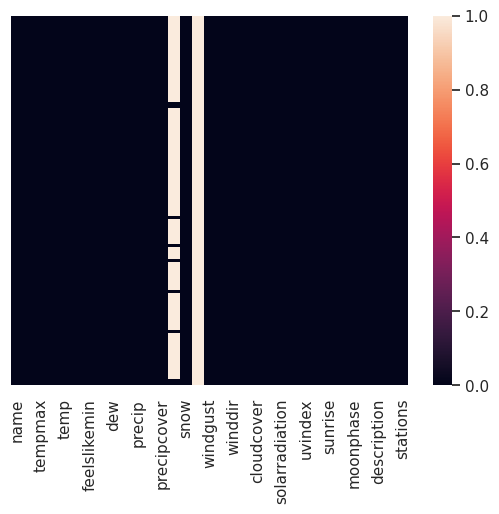

In [398]:
sns.heatmap(data1.isnull(), yticklabels=False)

There are too many null values present in preciptype. Also entire 'snow' column is empty. Hence we drop 'snow'.

<Axes: >

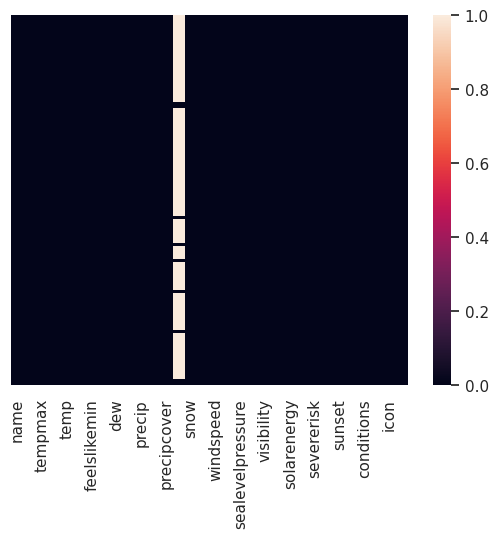

In [399]:
data1.drop(['snowdepth'], axis=1, inplace=True)
sns.heatmap(data1.isnull(), yticklabels=False)

In [400]:
data1['preciptype'].unique()

array([nan, 'rain'], dtype=object)

There are two values in preciptype, that is "rain" and "NaN". Hence we can replace NaN with "no rain".

In [401]:
data1['preciptype']= data1['preciptype'].replace({np.nan:"no rain"})
data1['preciptype'].unique()

array(['no rain', 'rain'], dtype=object)

<Axes: >

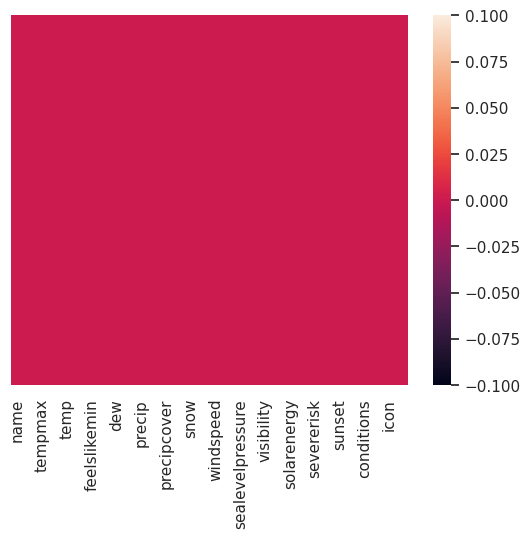

In [402]:
sns.heatmap(data1.isnull(), yticklabels=False)

##TEMP, TEMPMIN AND TEMPMAX ANALYSIS FOR WEATHER

<Axes: ylabel='temp'>

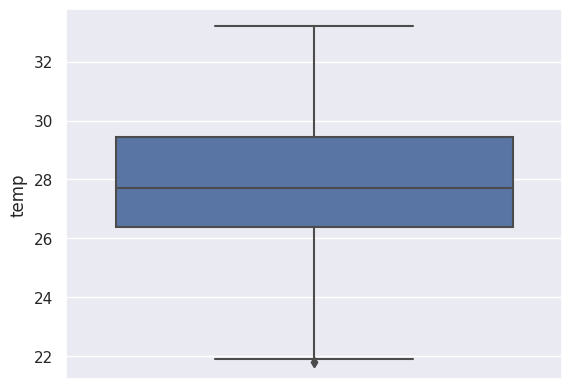

In [403]:
sns.boxplot(y=data1['temp'],data=data1)

<Axes: ylabel='Density'>

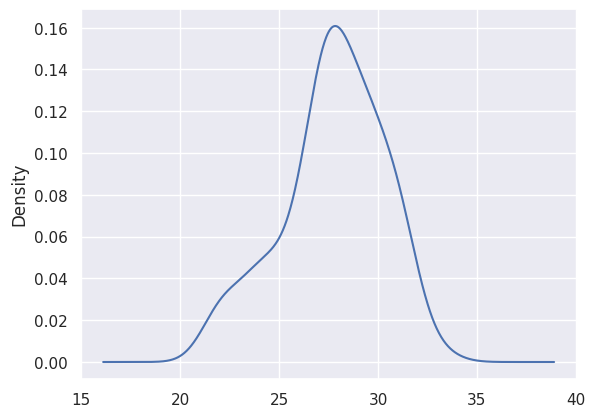

In [404]:
data1['temp'].plot(x='temp',kind='kde')

<Axes: ylabel='tempmax'>

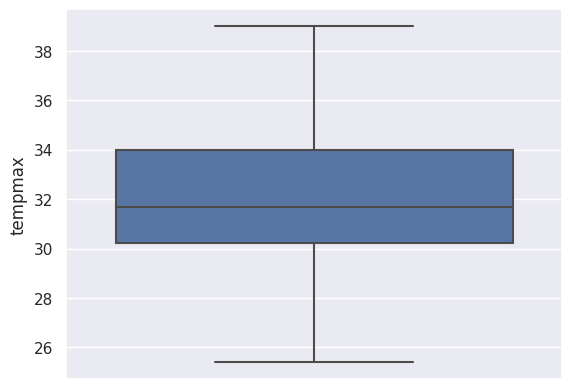

In [405]:
sns.boxplot(y=data1['tempmax'],data=data1)

<Axes: ylabel='Density'>

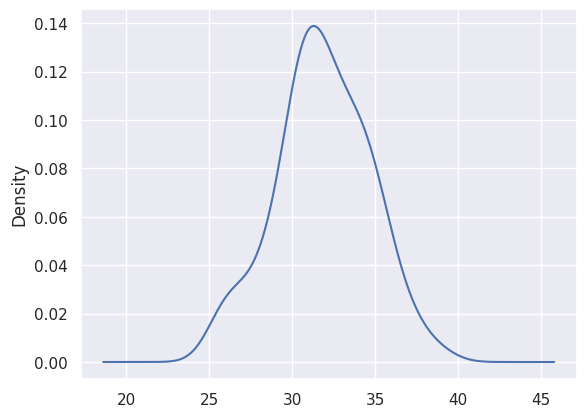

In [406]:
data1['tempmax'].plot(x='tempmax',kind='kde')

<Axes: ylabel='tempmin'>

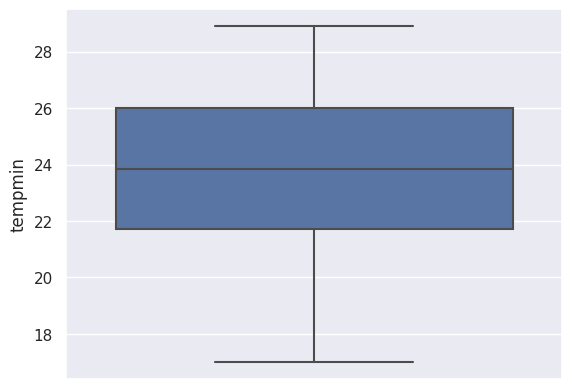

In [407]:
sns.boxplot(y=data1['tempmin'],data=data1)

<Axes: ylabel='Density'>

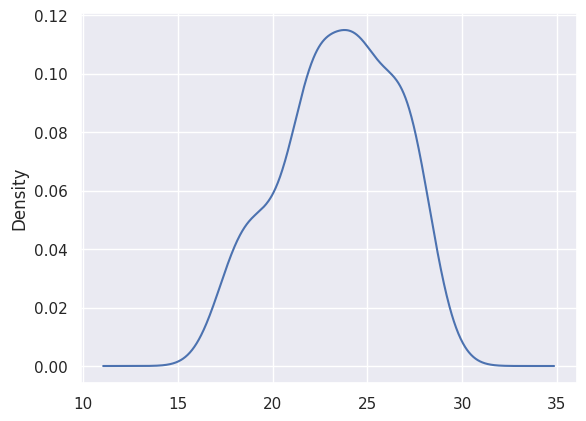

In [408]:
data1['tempmin'].plot(x='tempmin',kind='kde')

CONCLUSION: Temp, tempmin and tempmax approximately follows normal distribution.

##MUMBAI AQI ANALYSIS

In [409]:
data2 = pd.read_csv('/content/drive/MyDrive/datasets/AQI.csv')
data2.head(6)

,From Date,To Date,PM2.5,SO2,CO
0,01-01-2023 00:00,02-01-2023 00:00,99.83,37.30,1.36
1,02-01-2023 00:00,03-01-2023 00:00,113.08,38.82,1.69
2,03-01-2023 00:00,04-01-2023 00:00,123.98,39.52,1.77
3,04-01-2023 00:00,05-01-2023 00:00,116.1,39.69,1.72
4,05-01-2023 00:00,06-01-2023 00:00,139.76,40.18,2.09
5,06-01-2023 00:00,07-01-2023 00:00,131.33,40.28,1.94


In [410]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  120 non-null    object 
 1   To Date    120 non-null    object 
 2   PM2.5      120 non-null    object 
 3   SO2        120 non-null    float64
 4   CO         120 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.8+ KB


NOTE: PM2.5 is an object and not a floating number.

In [411]:
data2.describe()

,SO2,CO
count,120.000000,120.000000
mean,46.172333,1.356417
std,6.799643,0.484018
min,36.910000,0.550000
25%,42.230000,0.965000
50%,44.455000,1.300000
75%,47.847500,1.642500
max,70.270000,2.710000


PM2.5 is not visible here since it's an object and not float64. We will change it's data type to float64 for analysis.

In [412]:
data2['PM2.5'].unique()

array(['99.83', '113.08', '123.98', '116.1', '139.76', '131.33', '121.28',
       '99.45', '58.99', '53.85', '103.25', '62.6', '46.24', '61.47',
       '101.94', '107.28', '126.5', '167.91', '152.02', '104.24', '71.66',
       '58.29', '74.95', '87.75', '99.8', '118.12', '130.41', '79.87',
       '95.13', '84.52', '115.34', '98.44', '75', '85.86', '81', 'None',
       '17.92', '23.17', '37.54', '44.28', '64.43', '63.47', '51.01',
       '32.89', '50.73', '32.57', '28.1', '24.22', '25.46', '40.1',
       '44.85', '25.14', '15.83', '16.35', '17.8', '22.73', '32.26',
       '24.89', '20.32', '15.49', '13.96'], dtype=object)

NOTE: You can notice there is a string value 'None' that is present in 'PM2.5' column. We will replace it with NaN.

In [413]:
data2['PM2.5'] = data2['PM2.5'].replace({"None": np.nan})
data2.isnull().sum()

From Date     0
To Date       0
PM2.5        53
SO2           0
CO            0
dtype: int64

Hence, We have replaced "None" with NaN. Now we will first convert the type of 'PM2.5' column from object to double. Next we will calculate the mean of this column and replace NaN with the mean.

In [414]:
data2= data2.astype({'PM2.5':'double'})

mean= data2['PM2.5'].mean()

data2['PM2.5'] = data2['PM2.5'].replace({np.nan:mean})

data2['PM2.5'].isnull().sum()

0

In [415]:
data2['From Date'] = pd.to_datetime(data2['From Date'])
data2.rename(columns={'From Date':'datetime'},inplace=True)
data2.head()

,datetime,To Date,PM2.5,SO2,CO
0,2023-01-01,02-01-2023 00:00,99.83,37.30,1.36
1,2023-02-01,03-01-2023 00:00,113.08,38.82,1.69
2,2023-03-01,04-01-2023 00:00,123.98,39.52,1.77
3,2023-04-01,05-01-2023 00:00,116.10,39.69,1.72
4,2023-05-01,06-01-2023 00:00,139.76,40.18,2.09


##AQI AND WEATHER OF MUMBAI ANALYSIS(MERGED)

In [416]:
data = pd.merge(
  data1, data2, on=["datetime"]
)
data.head(2)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunset,moonphase,conditions,description,icon,stations,To Date,PM2.5,SO2,CO
0,mumbai,2023-01-01,28.0,18.7,23.6,27.9,18.7,23.6,14.6,58.5,...,2023-01-01T18:12:25,0.30,Clear,Clear conditions throughout the day.,clear-day,"VABB,VAJJ,43003099999,43057099999,43060099999",02-01-2023 00:00,99.83,37.30,1.36
1,mumbai,2023-02-01,30.6,18.7,24.9,30.5,18.7,25.0,16.2,60.4,...,2023-01-02T18:13:01,0.34,Clear,Clear conditions throughout the day.,clear-day,"43058099999,VABB,VAJJ,43003099999,43057099999,...",03-01-2023 00:00,113.08,38.82,1.69


In [417]:
data.shape

(120, 36)

In [418]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              120 non-null    object        
 1   datetime          120 non-null    datetime64[ns]
 2   tempmax           120 non-null    float64       
 3   tempmin           120 non-null    float64       
 4   temp              120 non-null    float64       
 5   feelslikemax      120 non-null    float64       
 6   feelslikemin      120 non-null    float64       
 7   feelslike         120 non-null    float64       
 8   dew               120 non-null    float64       
 9   humidity          120 non-null    float64       
 10  precip            120 non-null    float64       
 11  precipprob        120 non-null    int64         
 12  precipcover       120 non-null    float64       
 13  preciptype        120 non-null    object        
 14  snow              120 non-

In [419]:
data.drop(['name','datetime','visibility','sunrise','sunset','description','icon','stations','tempmax','tempmin','feelslikemax','feelslikemin','To Date',
           'snow'],axis=1 ,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp              120 non-null    float64
 1   feelslike         120 non-null    float64
 2   dew               120 non-null    float64
 3   humidity          120 non-null    float64
 4   precip            120 non-null    float64
 5   precipprob        120 non-null    int64  
 6   precipcover       120 non-null    float64
 7   preciptype        120 non-null    object 
 8   windgust          120 non-null    float64
 9   windspeed         120 non-null    float64
 10  winddir           120 non-null    float64
 11  sealevelpressure  120 non-null    float64
 12  cloudcover        120 non-null    float64
 13  solarradiation    120 non-null    float64
 14  solarenergy       120 non-null    float64
 15  uvindex           120 non-null    int64  
 16  severerisk        120 non-null    int64  
 1

In [420]:
data.columns[0:]

Index(['temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'solarradiation', 'solarenergy',
       'uvindex', 'severerisk', 'moonphase', 'conditions', 'PM2.5', 'SO2',
       'CO'],
      dtype='object')

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'feelslike'}>,
        <Axes: title={'center': 'dew'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'precip'}>,
        <Axes: title={'center': 'precipprob'}>,
        <Axes: title={'center': 'precipcover'}>,
        <Axes: title={'center': 'windgust'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'winddir'}>,
        <Axes: title={'center': 'sealevelpressure'}>,
        <Axes: title={'center': 'cloudcover'}>],
       [<Axes: title={'center': 'solarradiation'}>,
        <Axes: title={'center': 'solarenergy'}>,
        <Axes: title={'center': 'uvindex'}>,
        <Axes: title={'center': 'severerisk'}>],
       [<Axes: title={'center': 'moonphase'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'CO'}>]],
      dtype=object)

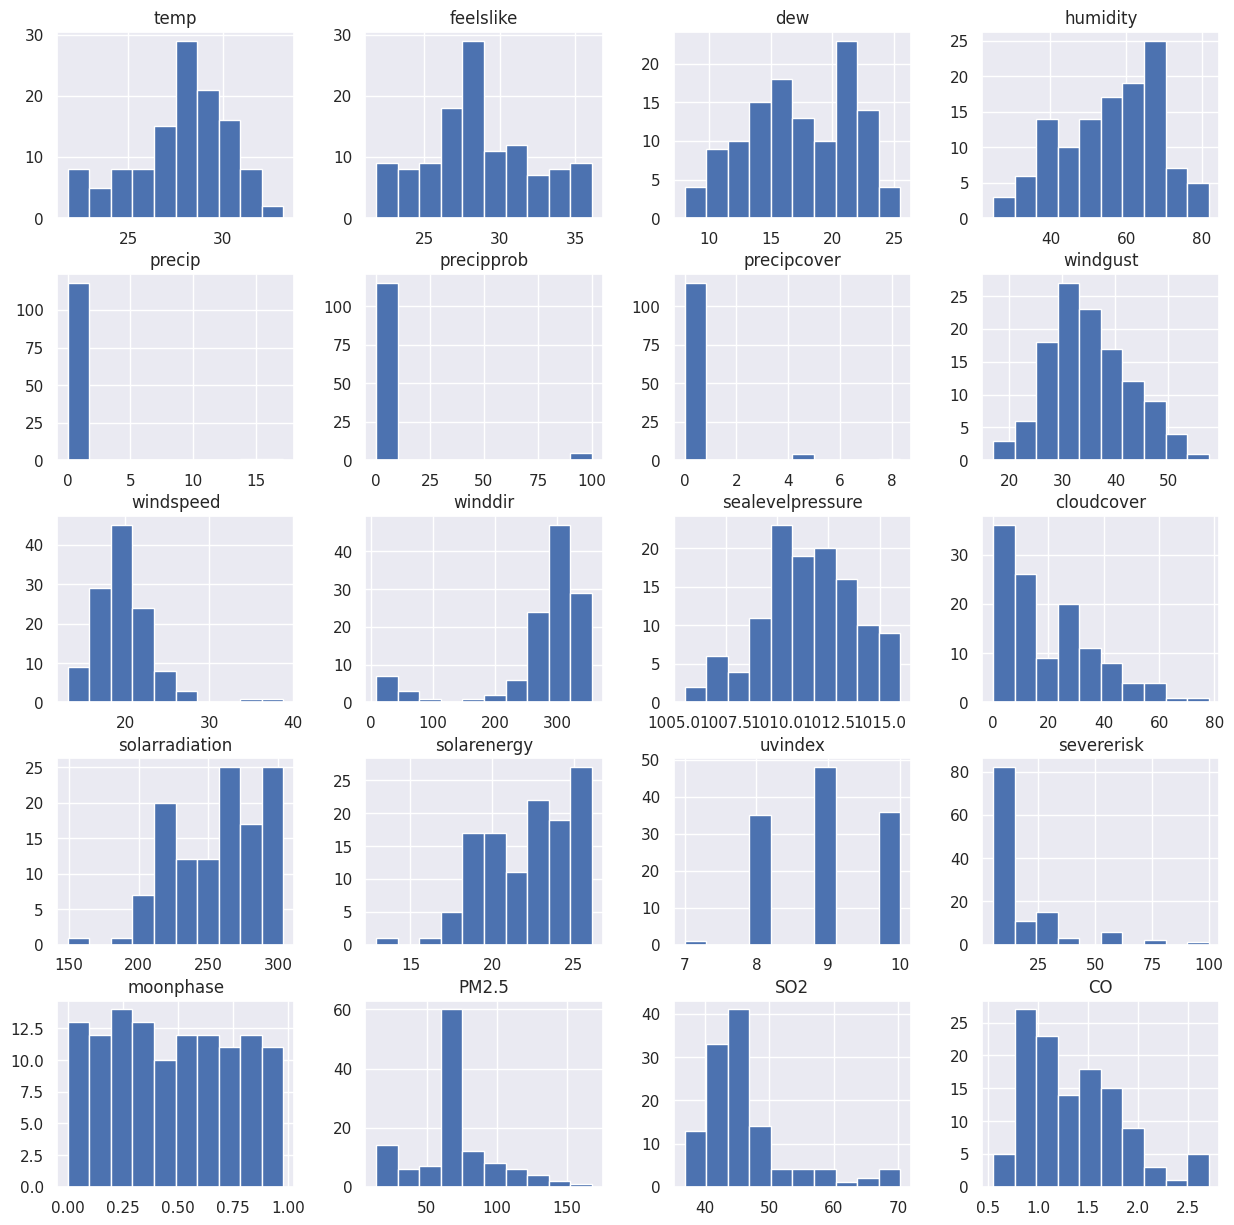

In [421]:
data_num = data.select_dtypes(include=['int64','float64'])
data_num.hist(figsize=(15,15))

In [422]:
data['conditions'].unique()

array(['Clear', 'Partially cloudy', 'Rain, Partially cloudy'],
      dtype=object)

In [423]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['conditions'] = le.fit_transform(data['conditions'])
data['conditions'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: conditions, dtype: int64

##PRECIPITATION ANALYSIS

**PRECIPCOVER ANALYSIS**

In [424]:
data['precipcover'].unique()

array([0.  , 4.17, 8.33])

In [425]:
pd.crosstab(data['conditions'],data['precipcover'],normalize='columns')*100

precipcover,0.00,4.17,8.33
conditions,,,
0,60.869565,0.0,0.0
1,39.130435,0.0,0.0
2,0.000000,100.0,100.0


<Axes: xlabel='precipcover', ylabel='conditions'>

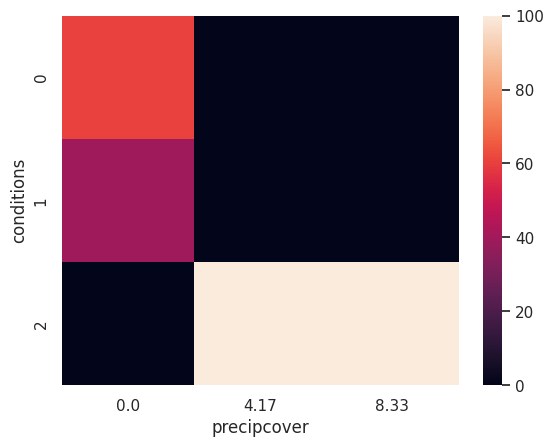

In [426]:
sns.heatmap(pd.crosstab(data['conditions'],data['precipcover'],normalize='columns')*100)

CONCLUSION: There is no rain when precipcover is 0.0. Also there is 100% certainty of rain when precipcover is 4.17 and 8.33. Precipcover 4.17 and 8.33 show similar trends.

In [427]:
data['precipcover']= data['precipcover'].replace({4.17:1,8.33:1})
data['precipcover'].unique()

array([0., 1.])

In [428]:
data['precipcover'] = le.fit_transform(data['precipcover'])
data['precipcover'].unique()

array([0, 1])

<Axes: ylabel='precipcover'>

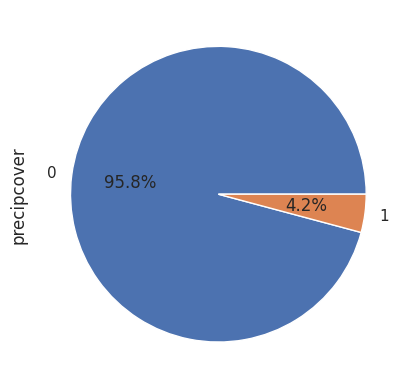

In [429]:
data['precipcover'].value_counts().plot(kind='pie',autopct='%0.1f%%')

**PRECIP ANALYSIS**

In [430]:
pd.crosstab(data['conditions'],data['precip'],normalize='columns')*100

precip,0.0,0.1,0.2,15.0,17.2
conditions,,,,,
0,60.869565,0.0,0.0,0.0,0.0
1,39.130435,0.0,0.0,0.0,0.0
2,0.000000,100.0,100.0,100.0,100.0


<Axes: xlabel='precip', ylabel='conditions'>

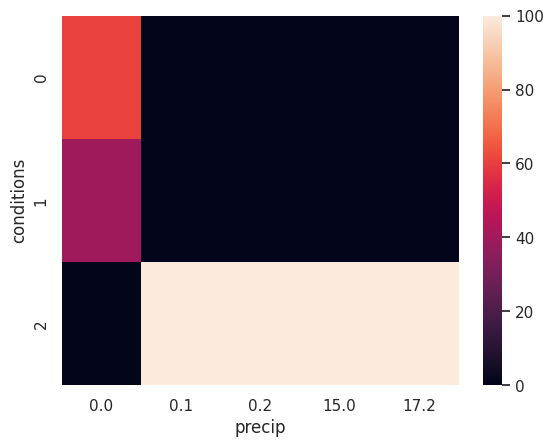

In [431]:
sns.heatmap(pd.crosstab(data['conditions'],data['precip'],normalize='columns')*100)

All the precip values except 0.0 show similar trends so we will replace it with 1 and encode it.

In [432]:
data['precip']= data['precip'].replace({0.1:1,0.2:1,15.0:1,17.2:1})
data['precip']= le.fit_transform(data['precip'])
data['precip'].unique()

array([0, 1])

<Axes: ylabel='precip'>

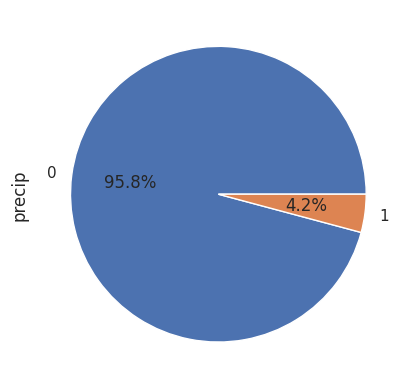

In [433]:
data['precip'].value_counts().plot(kind='pie',autopct='%0.1f%%')

**PRECIPTYPE ANALYSIS**

In [434]:
data['preciptype'].unique()

array(['no rain', 'rain'], dtype=object)

In [435]:
data['preciptype']= le.fit_transform(data['precip'])
data['precip'].unique()

array([0, 1])

In [436]:
pd.crosstab(data['conditions'],data['preciptype'],normalize='columns')*100

preciptype,0,1
conditions,,
0,60.869565,0.0
1,39.130435,0.0
2,0.000000,100.0


<Axes: xlabel='preciptype', ylabel='conditions'>

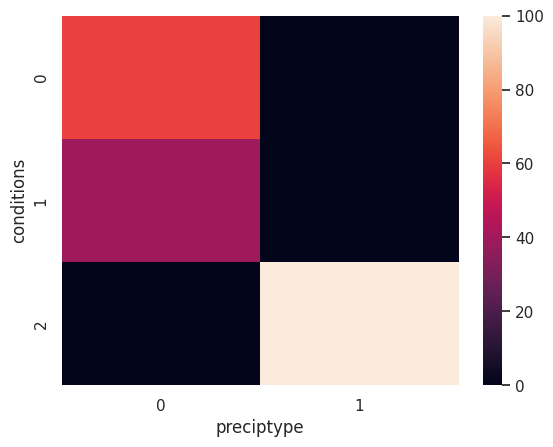

In [437]:
sns.heatmap(pd.crosstab(data['conditions'],data['preciptype'],normalize='columns')*100)

<Axes: ylabel='preciptype'>

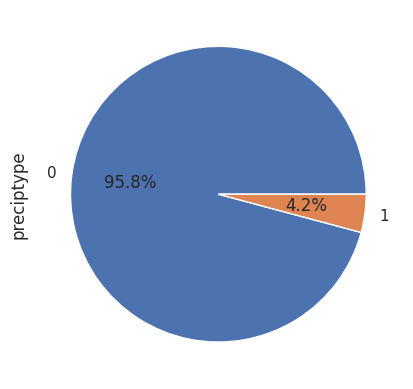

In [438]:
data['preciptype'].value_counts().plot(kind='pie',autopct='%0.1f%%')

**PRECIPPROB ANALYSIS**

In [439]:
data['precipprob'].unique()

array([  0, 100])

In [440]:
data['precipprob']= le.fit_transform(data['precipprob'])
data['precipprob'].unique()

array([0, 1])

In [441]:
pd.crosstab(data['conditions'],data['precipprob'],normalize='columns')*100

precipprob,0,1
conditions,,
0,60.869565,0.0
1,39.130435,0.0
2,0.000000,100.0


<Axes: xlabel='precipprob', ylabel='conditions'>

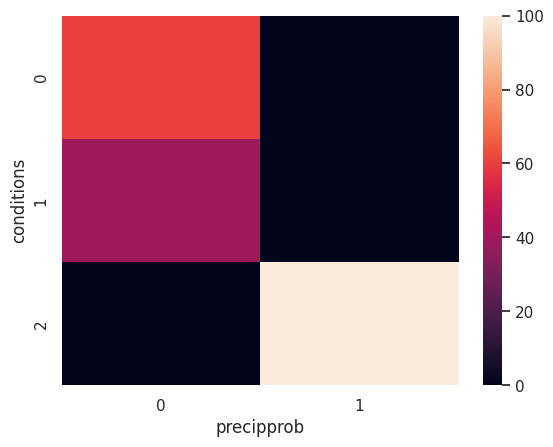

In [442]:
sns.heatmap(pd.crosstab(data['conditions'],data['precipprob'],normalize='columns')*100)

<Axes: ylabel='precipprob'>

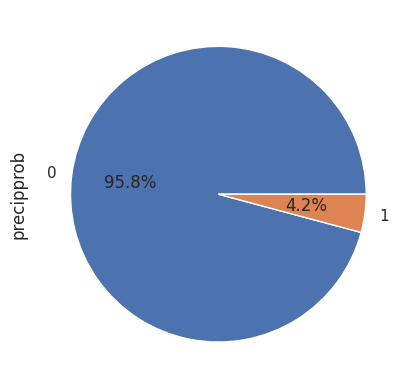

In [443]:
data['precipprob'].value_counts().plot(kind='pie',autopct='%0.1f%%')

CONCLUSION: There is 100% probablity of rain when the precip value in any of the precip columns is other than 0 and there is no rain when precip value in any column is 0. We can deduce that all the precip values except 0 show similar trend and there is a high similarity between them.

##TEMPARATURE ANALYSIS

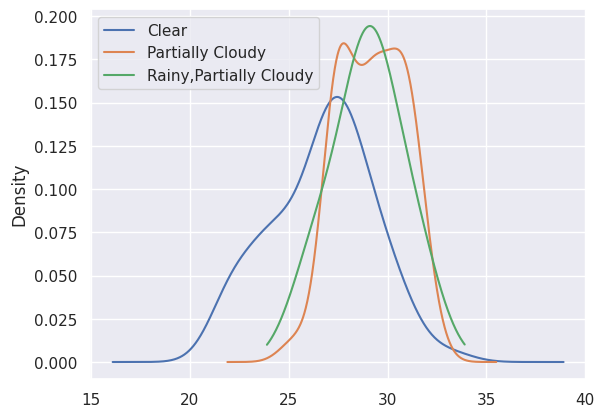

In [444]:
data[data['conditions'] == 0]['temp'].plot(kind='kde',label='Clear')
data[data['conditions'] == 1]['temp'].plot(kind='kde',label='Partially Cloudy')
data[data['conditions'] == 2]['temp'].plot(kind='kde',label='Rainy,Partially Cloudy')
plt.legend()
plt.show()

CONCLUSION: 'Clear' and 'Rainy, Partially Cloudy' show normal distribution

##FEELSLIKE ANALYSIS

In [445]:
data.columns

Index(['temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'solarradiation', 'solarenergy',
       'uvindex', 'severerisk', 'moonphase', 'conditions', 'PM2.5', 'SO2',
       'CO'],
      dtype='object')

'feelslike' is approximately equal to 'temp', hence we drop it. 

In [446]:
data.drop(['feelslike'],axis=1,inplace=True)

##PM2.5, CO, SO2 ANALYSIS

<Axes: ylabel='PM2.5'>

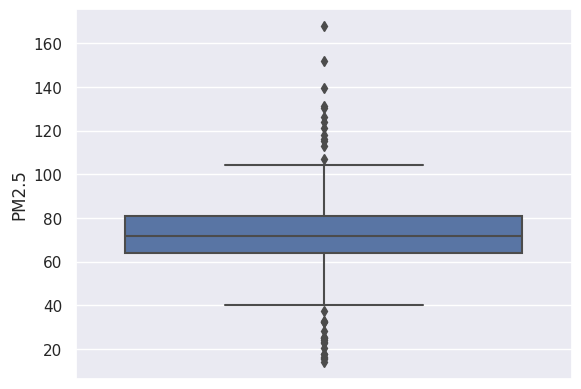

In [447]:
sns.boxplot(y=data['PM2.5'],data=data)

<Axes: xlabel='conditions', ylabel='PM2.5'>

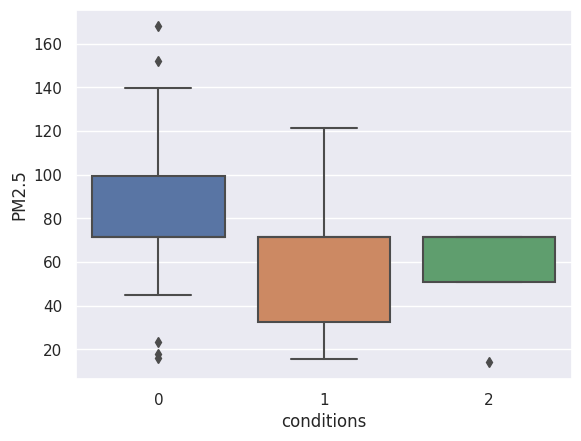

In [448]:
sns.boxplot(y='PM2.5', x='conditions',data=data)

<Axes: ylabel='CO'>

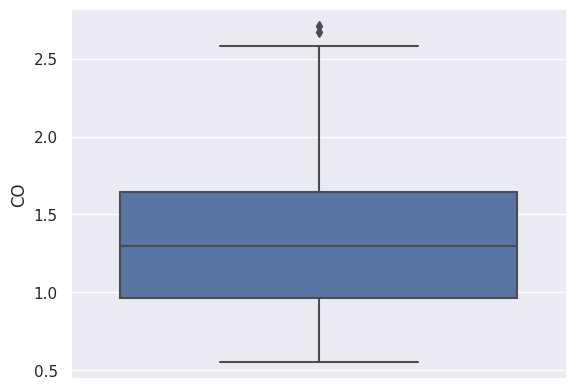

In [449]:
sns.boxplot(y=data['CO'],data=data)

<Axes: xlabel='conditions', ylabel='CO'>

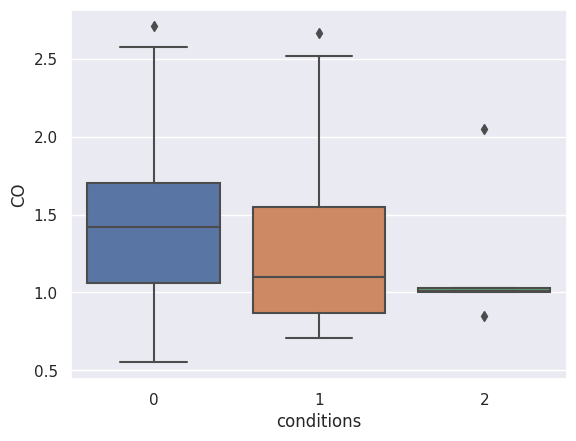

In [450]:
sns.boxplot(y='CO', x='conditions',data=data)

<Axes: ylabel='SO2'>

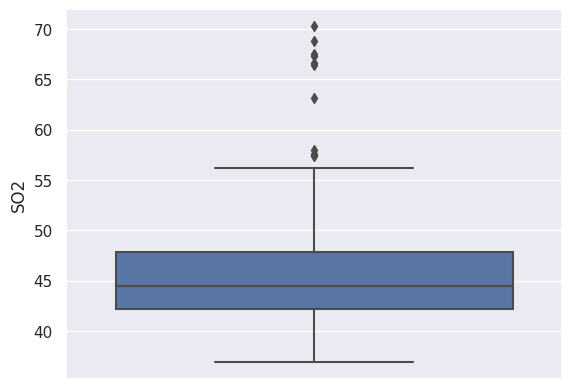

In [451]:
sns.boxplot(y=data['SO2'],data=data)

<Axes: xlabel='conditions', ylabel='SO2'>

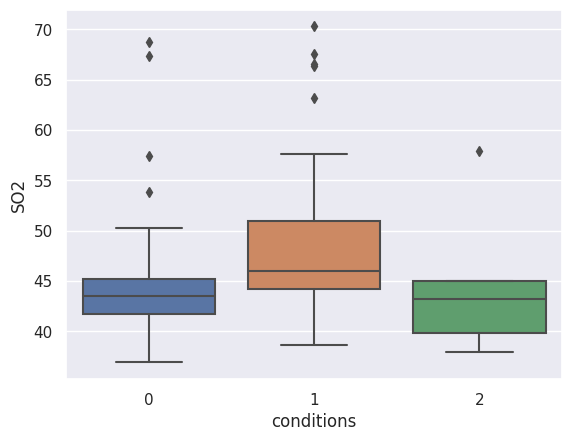

In [452]:
sns.boxplot(y='SO2', x='conditions',data=data)

There are outliers in PM2.5, SO2 and CO, Hence we will equal them to the upper and lower quartiles.

##HANDLING OUTLIERS OF PM2.5, SO2, CO

<Axes: ylabel='PM2.5'>

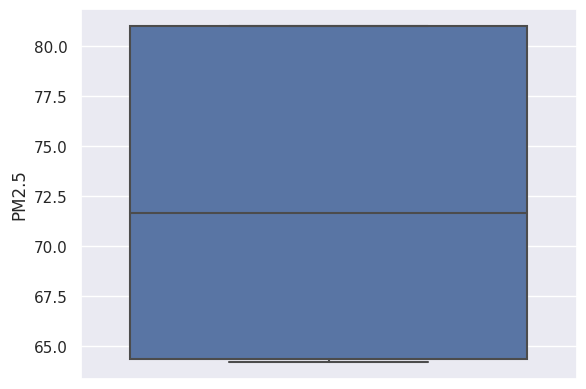

In [453]:
parameters = ['PM2.5','CO','SO2']
for i in parameters:
  Q1 = np.percentile(data[i], 25)
  Q3 = np.percentile(data[i], 75)
  data[i]= data[i].apply(lambda x: Q1 if x<=Q1 else Q3 if x>=Q3 else x) 

sns.boxplot(y=data['PM2.5'],data=data)

<Axes: ylabel='CO'>

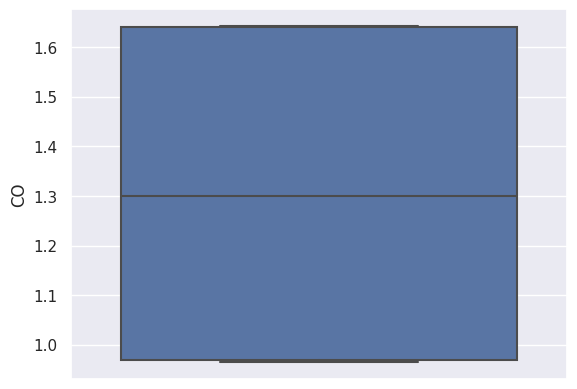

In [454]:
sns.boxplot(y=data['CO'],data=data)

<Axes: ylabel='SO2'>

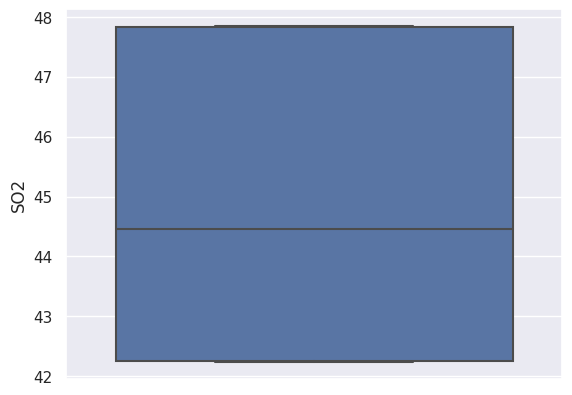

In [455]:
sns.boxplot(y=data['SO2'],data=data)

##UVINDEX ANALYSIS

In [456]:
data['uvindex'].unique()

array([ 8,  9, 10,  7])

In [457]:
pd.crosstab(data['conditions'],data['uvindex'],normalize='columns')*100

uvindex,7,8,9,10
conditions,,,,
0,0.0,88.571429,64.583333,22.222222
1,100.0,8.571429,29.166667,75.000000
2,0.0,2.857143,6.250000,2.777778


<Axes: xlabel='uvindex', ylabel='conditions'>

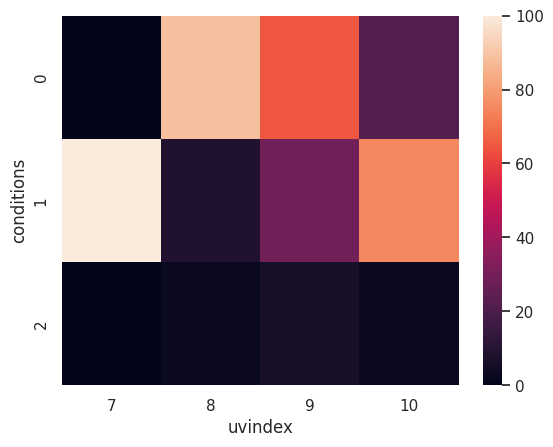

In [458]:
sns.heatmap(pd.crosstab(data['conditions'],data['uvindex'],normalize='columns')*100)

Encoding uvindex as there are only foure types of unique data

In [459]:
data['uvindex']= le.fit_transform(data['uvindex'])
data['uvindex'].unique()

array([1, 2, 3, 0])

##CLOUD COVER ANALYSIS

In [460]:
data['cloudcover'].unique()

array([12.8,  1.1,  9.1,  2.4, 14.4, 13.2, 29.1,  6.7,  0. ,  1. ,  9.6,
        1.6,  8.5,  2. ,  2.1,  1.9, 12.3,  4.8,  9.4,  6. ,  6.5, 13.4,
       11.3, 25.2, 11.9,  7.4, 15.4, 25.5, 13.3, 29.2,  5.1, 11.4,  8.1,
       16.1, 19.6,  9.2,  2.7,  2.9,  3.4,  0.5,  4.3, 14.6, 13.6,  0.7,
        9.9,  0.2,  0.4,  0.1,  3.8,  7.8, 49. , 69. , 35.4, 17.8, 15.2,
       31.4, 29.9, 32.5, 58.4, 77.9, 37.7, 12.2, 30.3, 42.9, 61.3, 37.4,
       11.6, 19.4, 30.4, 23.9, 25. , 52.4, 46.6, 20.3, 15.9, 27.2, 18.2,
       17.9, 29.7, 49.9, 55.5, 34. , 34.8, 30. , 52.6, 58.2, 23.8, 27. ,
       24.2, 19.7, 33.5, 39.4, 38.9, 44.7, 45.9, 44.1, 28.9, 38.4, 43.7])

<Axes: ylabel='cloudcover'>

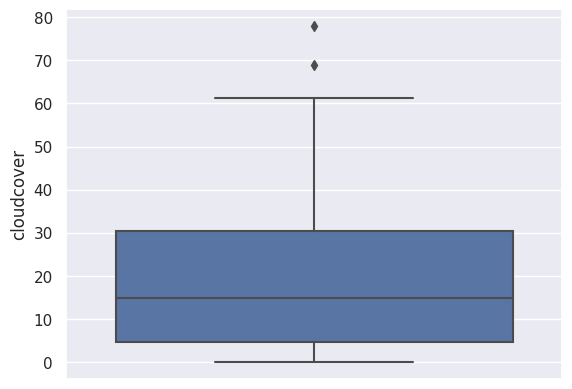

In [461]:
sns.boxplot(y=data['cloudcover'],data=data)

<Axes: ylabel='Density'>

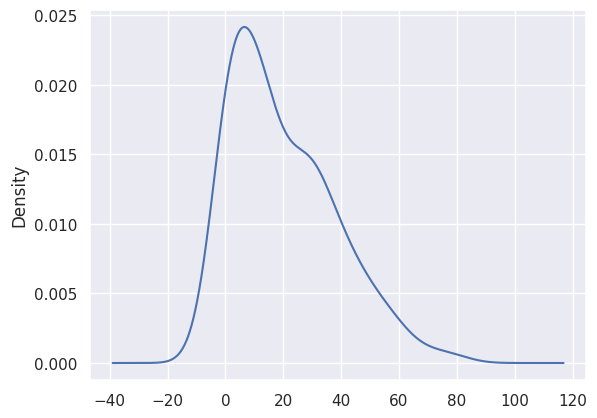

In [462]:
data['cloudcover'].plot(kind='kde')

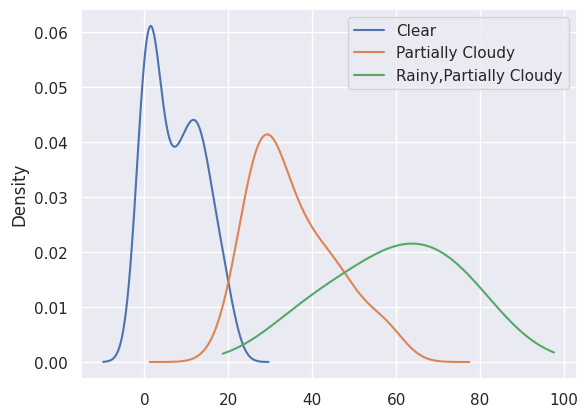

In [463]:
data[data['conditions'] == 0]['cloudcover'].plot(kind='kde',label='Clear')
data[data['conditions'] == 1]['cloudcover'].plot(kind='kde',label='Partially Cloudy')
data[data['conditions'] == 2]['cloudcover'].plot(kind='kde',label='Rainy,Partially Cloudy')
plt.legend()
plt.show()

<Axes: xlabel='conditions', ylabel='cloudcover'>

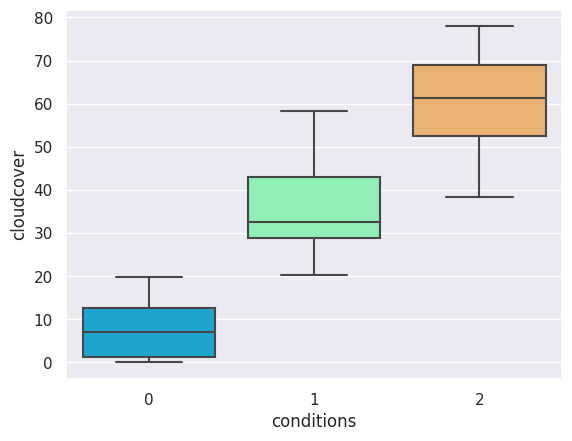

In [464]:
sns.boxplot(x='conditions',y='cloudcover',data=data,palette='rainbow')

##DEW ANALYSIS

In [465]:
data.columns

Index(['temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk',
       'moonphase', 'conditions', 'PM2.5', 'SO2', 'CO'],
      dtype='object')

In [466]:
data['dew'].unique()

array([14.6, 16.2, 17.2, 16.8, 17.5, 18.4, 19. , 16. , 11.4, 11.6, 14.2,
       15.6, 16.9, 11.1, 12.9, 15.4, 15.8, 17.4, 16.6, 15.3, 11. , 11.2,
       11.7, 14.1, 18. , 19.1, 21.9, 19.5, 18.3, 16.4, 14.3, 13.8, 15. ,
       16.5, 15.7, 14.9,  9.9,  9.3,  9.6, 11.8, 10.4, 12.4,  9.2, 18.5,
       13.6, 11.9, 13.1, 13.5, 13.4, 14.4,  8. , 12. , 15.9, 17.1, 19.6,
       22.5, 20.8, 22.9, 21. , 19.2, 20. , 20.5, 20.6, 21.3, 17.9, 17.6,
       21.2, 21.4, 20.7, 20.4, 23.1, 23.9, 19.7, 21.1, 22.4, 22.8, 20.3,
       21.7, 22.7, 21.5, 23.8, 23.3, 24.8, 25.5, 23.6, 23. , 22.2])

<Axes: ylabel='dew'>

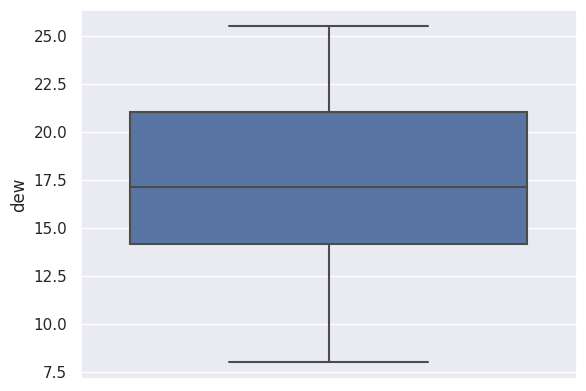

In [467]:
sns.boxplot(y=data['dew'],data=data)

<Axes: ylabel='Density'>

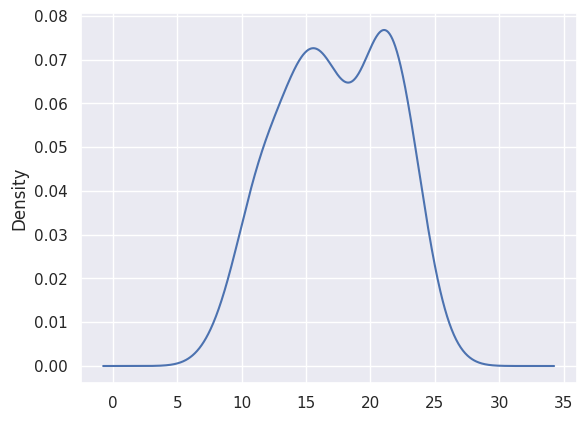

In [468]:
data['dew'].plot(kind='kde')

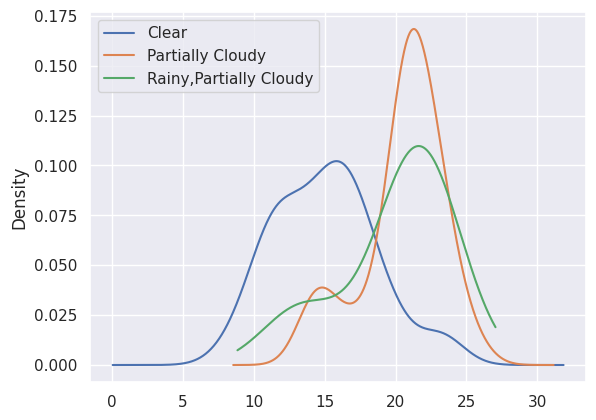

In [469]:
data[data['conditions'] == 0]['dew'].plot(kind='kde',label='Clear')
data[data['conditions'] == 1]['dew'].plot(kind='kde',label='Partially Cloudy')
data[data['conditions'] == 2]['dew'].plot(kind='kde',label='Rainy,Partially Cloudy')
plt.legend()
plt.show()

<Axes: xlabel='conditions', ylabel='dew'>

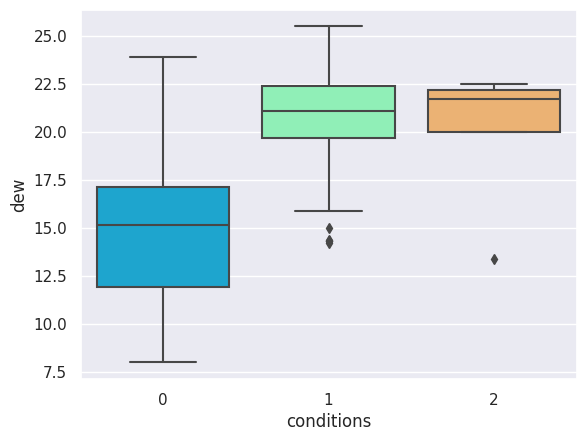

In [470]:
sns.boxplot(x='conditions',y='dew',data=data,palette='rainbow')

CONCLUSION: 

##WINDSPEED, WINDGUST AND WIND DIRECTION ANALYSIS

**WINDSPEED ANALYSIS**

In [471]:
data['windspeed'].unique()

array([17.2, 18.4, 16.7, 13.1, 17.1, 14.8, 16.6, 16. , 18.7, 22.2, 15.4,
       19.3, 22.3, 18.2, 21.8, 17.8, 19.9, 21.7, 19.6, 19.8, 18.1, 24.1,
       20.5, 19. , 14.9, 14.2, 27.7, 25.7, 21.1, 17.6, 16.1, 19.4, 23. ,
       26. , 23.6, 18.8, 23.5, 38.9, 20.9, 33.8, 24.2, 24.8])

<Axes: ylabel='Density'>

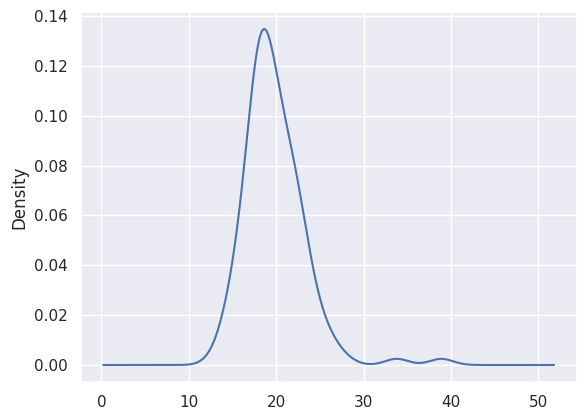

In [472]:
data['windspeed'].plot(kind='kde')

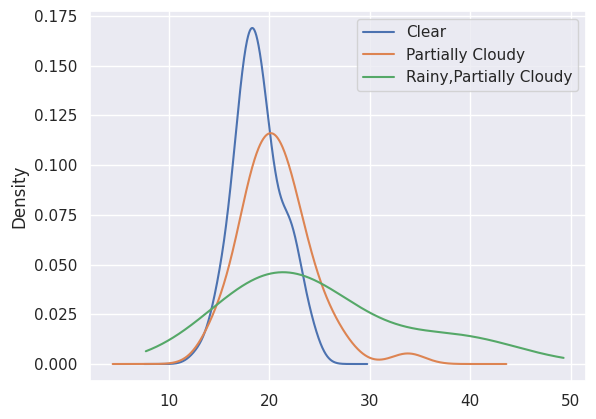

In [473]:
data[data['conditions'] == 0]['windspeed'].plot(kind='kde',label='Clear')
data[data['conditions'] == 1]['windspeed'].plot(kind='kde',label='Partially Cloudy')
data[data['conditions'] == 2]['windspeed'].plot(kind='kde',label='Rainy,Partially Cloudy')
plt.legend()
plt.show()

<Axes: xlabel='conditions', ylabel='windspeed'>

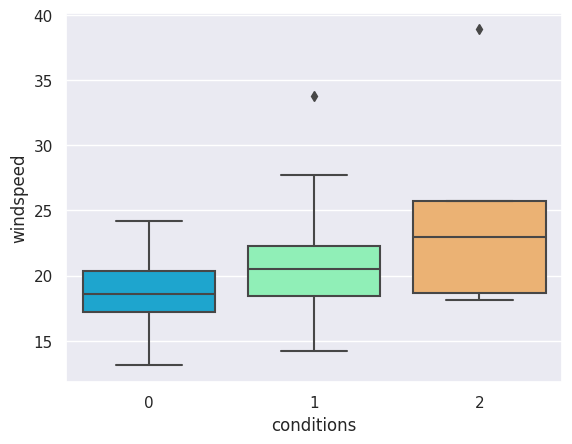

In [474]:
sns.boxplot(x='conditions',y='windspeed',data=data,palette='rainbow')

**WINDGUST ANALYSIS**

In [475]:
data['windgust'].unique()

array([32.8, 31. , 32.4, 25.9, 24.5, 36. , 35.3, 34.9, 32. , 27.7, 28.1,
       28.8, 24.8, 25.2, 23.4, 23. , 19.4, 16.9, 26.6, 31.7, 47.5, 37.4,
       25.6, 38.9, 45. , 41. , 43.6, 40. , 38.2, 41.4, 42.5, 39.6, 46.4,
       50. , 41.8, 46.1, 50.8, 33.5, 27.4, 29.5, 39.2, 43.2, 48.6, 45.4,
       49. , 36.7, 30.2, 28.4, 31.3, 40.7, 30.6, 24.1, 18. , 32.5, 37.1,
       44.6, 26.3, 57.6, 47.9, 33.1, 36.4, 49.3, 53.3])

<Axes: ylabel='Density'>

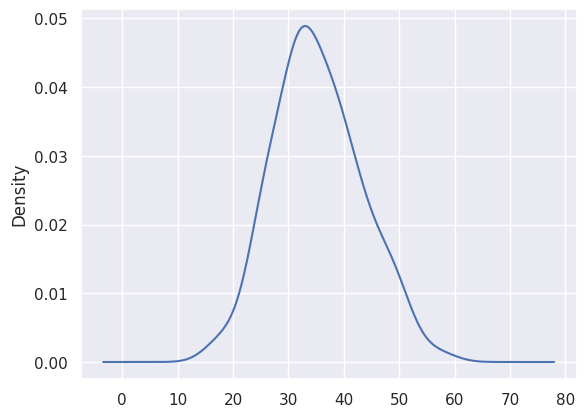

In [476]:
data['windgust'].plot(kind='kde')

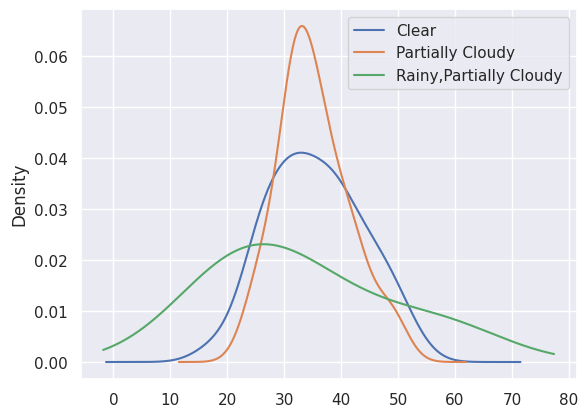

In [477]:
data[data['conditions'] == 0]['windgust'].plot(kind='kde',label='Clear')
data[data['conditions'] == 1]['windgust'].plot(kind='kde',label='Partially Cloudy')
data[data['conditions'] == 2]['windgust'].plot(kind='kde',label='Rainy,Partially Cloudy')
plt.legend()
plt.show()

<Axes: xlabel='conditions', ylabel='windgust'>

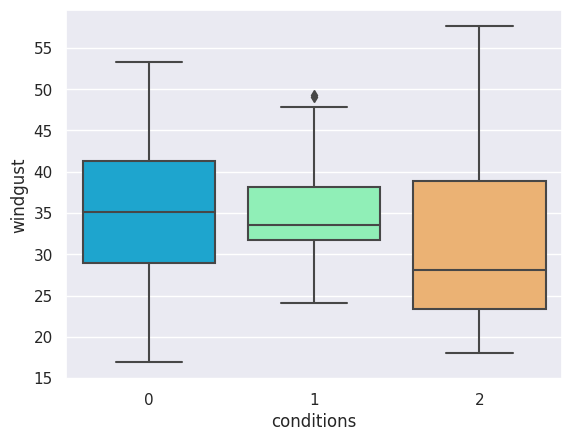

In [478]:
sns.boxplot(x='conditions',y='windgust',data=data,palette='rainbow')

CONCLUSION: BOTH WINDGUST AND WINDSPEED FOLLOW NORMAL DISTRIBUTION

**WINDDIR ANALYSIS**

In [479]:
data['winddir'].unique()

array([327.2, 333.6, 301.1, 279.2, 344.1,  64. ,  44.1,  31.3,  17. ,
         8.1, 286.2, 323.9, 332.5, 343. , 310. , 300.9, 305.2, 257.2,
       267.7, 294.3, 316.7, 330.6, 332. , 325.7, 329.7, 321.2, 306.9,
       224.7, 303.9, 338.2, 339.5,  26.6,  31.6, 305.7, 297.6, 295.8,
       326.4, 329.8, 319. , 263.4, 301.4, 321.1, 345.6,  31.2, 334. ,
       289.7, 343.3, 332.1, 355.4, 253.6, 246.6, 294.7, 298.8, 295.9,
       319.4, 323.5, 315.1, 299. , 299.6, 331.3, 257.3, 256.9, 253. ,
       289.1,  59.7,  78.1, 334.7,  15.3, 341.8, 242.7, 186.5, 290. ,
       271.1, 203. , 259.1, 288. , 283.2, 179. , 284.7, 305.8, 306.5,
       319.3, 300.5, 302.2, 291.2, 262.4, 274.1, 316.2, 298.7, 288.2,
       297.3, 286.6, 323.3, 324.3, 260.7, 279. , 290.6, 313.4, 308.1,
       308.6, 298.5, 304.4, 305.6, 331.4, 317.4, 302.5, 281.7, 278.1,
       282. , 278.3, 247.3, 226.3, 285.5, 288.7, 268.7, 264.4])

<Axes: ylabel='Density'>

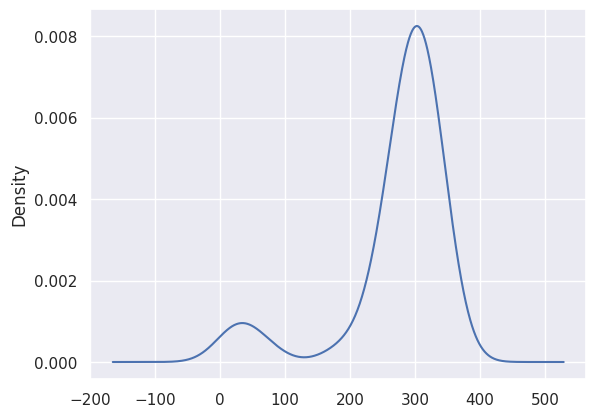

In [480]:
data['winddir'].plot(kind='kde')

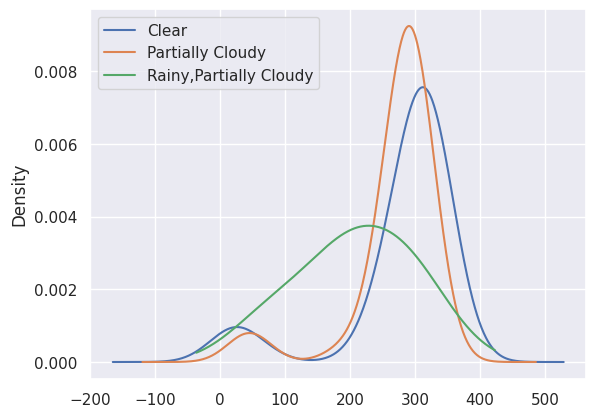

In [481]:
data[data['conditions'] == 0]['winddir'].plot(kind='kde',label='Clear')
data[data['conditions'] == 1]['winddir'].plot(kind='kde',label='Partially Cloudy')
data[data['conditions'] == 2]['winddir'].plot(kind='kde',label='Rainy,Partially Cloudy')
plt.legend()
plt.show()

<Axes: xlabel='conditions', ylabel='winddir'>

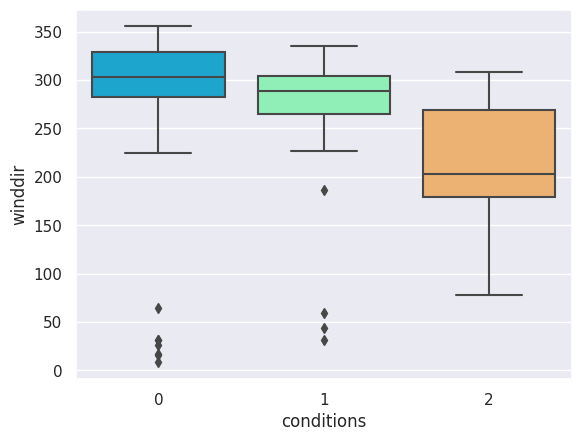

In [482]:
sns.boxplot(x='conditions',y='winddir',data=data,palette='rainbow')

<Axes: ylabel='winddir'>

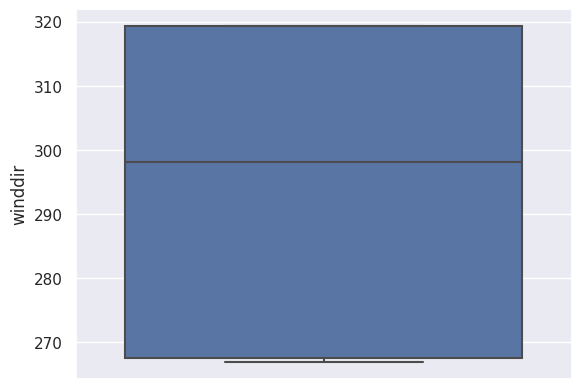

In [483]:
Q1 = np.percentile(data['winddir'], 25)
Q3 = np.percentile(data['winddir'], 75)
data['winddir']= data['winddir'].apply(lambda x: Q1 if x<=Q1 else Q3 if x>=Q3 else x)
sns.boxplot(y=data['winddir'],data=data)

In [484]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp              120 non-null    float64
 1   dew               120 non-null    float64
 2   humidity          120 non-null    float64
 3   precip            120 non-null    int64  
 4   precipprob        120 non-null    int64  
 5   precipcover       120 non-null    int64  
 6   preciptype        120 non-null    int64  
 7   windgust          120 non-null    float64
 8   windspeed         120 non-null    float64
 9   winddir           120 non-null    float64
 10  sealevelpressure  120 non-null    float64
 11  cloudcover        120 non-null    float64
 12  solarradiation    120 non-null    float64
 13  solarenergy       120 non-null    float64
 14  uvindex           120 non-null    int64  
 15  severerisk        120 non-null    int64  
 16  moonphase         120 non-null    float64
 1

##SOLAR ENERGY AND SOLAR RADIATION ANALYSIS

In [485]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp              120 non-null    float64
 1   dew               120 non-null    float64
 2   humidity          120 non-null    float64
 3   precip            120 non-null    int64  
 4   precipprob        120 non-null    int64  
 5   precipcover       120 non-null    int64  
 6   preciptype        120 non-null    int64  
 7   windgust          120 non-null    float64
 8   windspeed         120 non-null    float64
 9   winddir           120 non-null    float64
 10  sealevelpressure  120 non-null    float64
 11  cloudcover        120 non-null    float64
 12  solarradiation    120 non-null    float64
 13  solarenergy       120 non-null    float64
 14  uvindex           120 non-null    int64  
 15  severerisk        120 non-null    int64  
 16  moonphase         120 non-null    float64
 1

In [486]:
data['solarenergy'].unique()

array([18.4, 18.2, 17.9, 17.8, 18.7, 19.3, 19.2, 18.5, 19.7, 19.8, 19.9,
       19.6, 19.5, 19.4, 20. , 19.1, 18.8, 20.1, 20.2, 20.4, 20.7, 21.1,
       21. , 21.7, 21.9, 21.8, 22. , 22.4, 22.6, 22.7, 23.1, 23. , 21.4,
       23.5, 23.2, 23.7, 23.6, 22.9, 22.2, 22.8, 17. , 23.9, 24. , 23.8,
       23.3, 18.6, 12.9, 24.3, 24.4, 24.5, 24.2, 24.8, 25.5, 25.4, 25.1,
       25.3, 25.2, 16.1, 24.6, 25.6, 20.8, 21.6, 26. , 26.1, 25.9, 25.8,
       25. ])

<Axes: ylabel='solarenergy'>

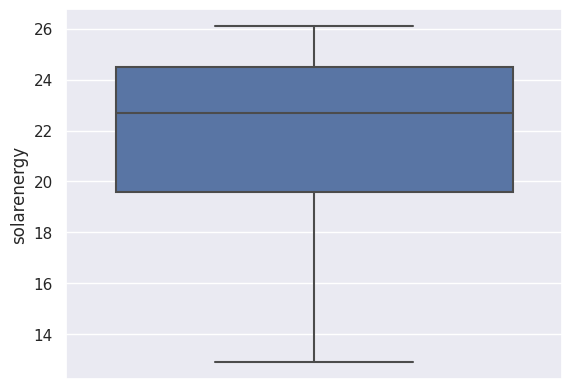

In [487]:
sns.boxplot(y=data['solarenergy'],data=data)

<Axes: ylabel='Density'>

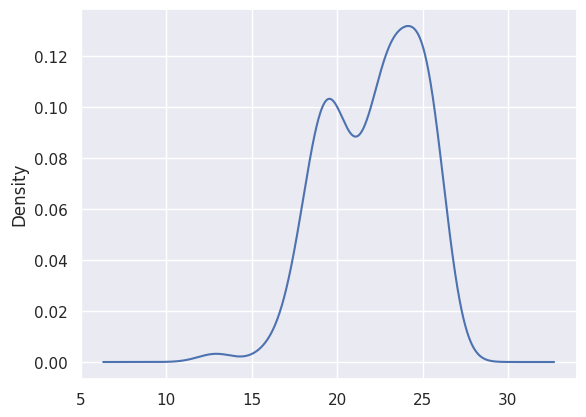

In [488]:
data['solarenergy'].plot(kind='kde')

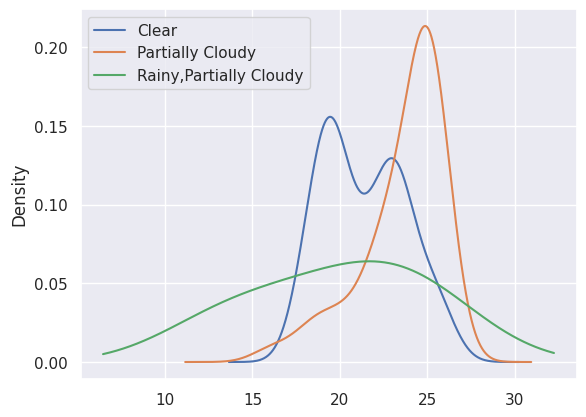

In [489]:
data[data['conditions'] == 0]['solarenergy'].plot(kind='kde',label='Clear')
data[data['conditions'] == 1]['solarenergy'].plot(kind='kde',label='Partially Cloudy')
data[data['conditions'] == 2]['solarenergy'].plot(kind='kde',label='Rainy,Partially Cloudy')
plt.legend()
plt.show()

<Axes: xlabel='conditions', ylabel='solarenergy'>

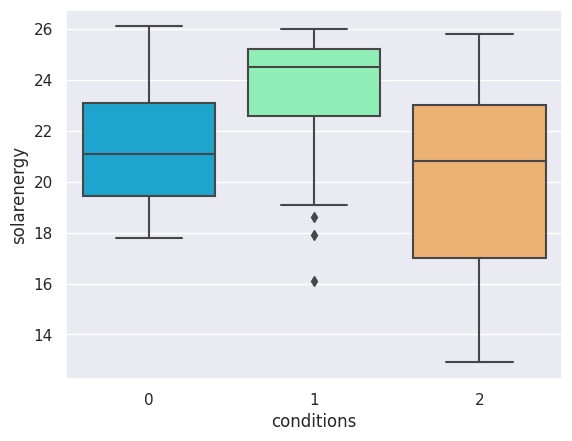

In [490]:
sns.boxplot(x='conditions',y='solarenergy',data=data,palette='rainbow')

In [491]:
data['solarradiation'].unique()

array([212.3, 213.5, 209.8, 207.7, 206.2, 207.5, 210.2, 216.5, 225.5,
       221.4, 222.8, 215.8, 224.4, 224.8, 226.3, 227.4, 229.8, 226.6,
       224.3, 224.6, 226. , 223.6, 225.9, 226.9, 224.2, 231.3, 221. ,
       218.5, 233.3, 227.7, 229.9, 234.6, 235.1, 240. , 243.6, 244.3,
       244.4, 243.2, 250.7, 254.2, 254.8, 255.3, 259.3, 261.1, 261.5,
       263.3, 267.9, 267.4, 262.2, 262.6, 248.2, 271. , 270.5, 267.6,
       272.5, 272.2, 273.5, 268.6, 266.7, 268.3, 266.6, 259.2, 265. ,
       197.9, 256.4, 275.6, 278.5, 276.4, 269.5, 262.4, 258.3, 216.1,
       149. , 268.5, 280.3, 282.4, 282. , 266. , 280.5, 279.8, 288.1,
       294.6, 294.1, 290.3, 292.9, 294.7, 274.7, 283.4, 295.6, 292.6,
       291.5, 290.1, 291.8, 245. , 186.7, 284. , 279.1, 292. , 295.9,
       248.3, 299.8, 298.9, 261.6, 299.5, 286.5, 303.8, 298.5, 295.1,
       289.8, 284.5, 284.7, 299. , 297. ])

<Axes: ylabel='solarradiation'>

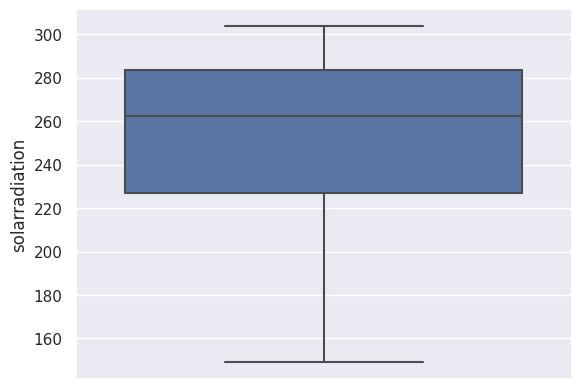

In [492]:
sns.boxplot(y=data['solarradiation'],data=data)

<Axes: ylabel='Density'>

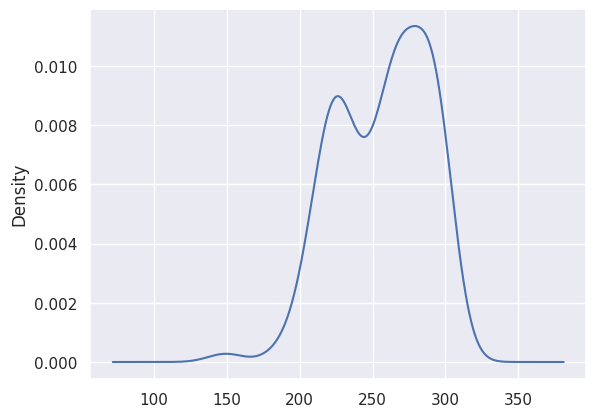

In [493]:
data['solarradiation'].plot(kind='kde')

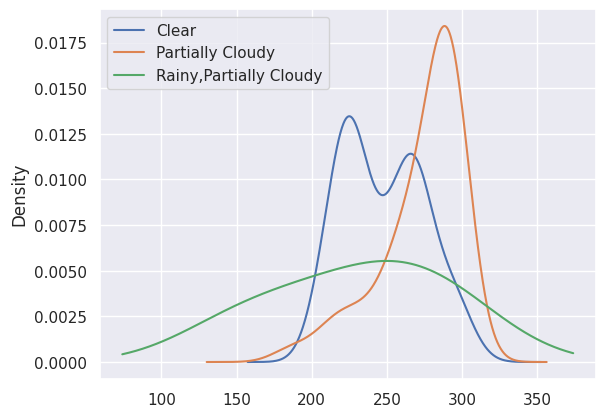

In [494]:
data[data['conditions'] == 0]['solarradiation'].plot(kind='kde',label='Clear')
data[data['conditions'] == 1]['solarradiation'].plot(kind='kde',label='Partially Cloudy')
data[data['conditions'] == 2]['solarradiation'].plot(kind='kde',label='Rainy,Partially Cloudy')
plt.legend()
plt.show()

<Axes: xlabel='conditions', ylabel='solarradiation'>

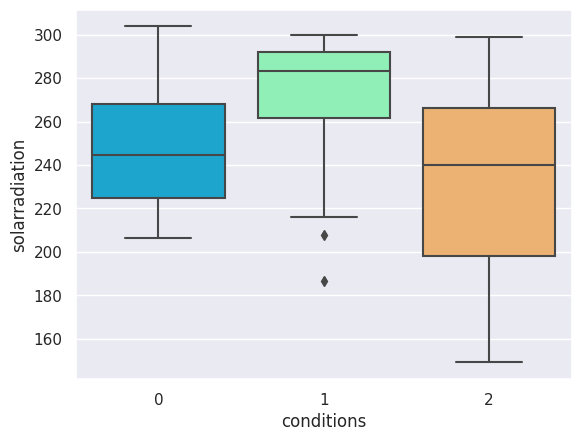

In [495]:
sns.boxplot(x='conditions',y='solarradiation',data=data,palette='rainbow')

##SEA LEVEL PRESSURE ANALYSIS

In [496]:
data['sealevelpressure'].unique()

array([1016. , 1015. , 1014.8, 1013.5, 1014.2, 1015.8, 1014.9, 1015.9,
       1015.2, 1013.4, 1012.8, 1013.9, 1013.8, 1012. , 1012.1, 1012.6,
       1013.3, 1013.6, 1013.1, 1012.4, 1011. , 1010.1, 1010. , 1012.2,
       1011.4, 1011.9, 1012.7, 1010.4, 1011.3, 1012.9, 1013.2, 1013. ,
       1011.5, 1011.7, 1012.3, 1014.1, 1014.5, 1015.4, 1014.6, 1012.5,
       1011.2, 1010.8, 1009.8, 1008.8, 1007.7, 1009.1, 1009.9, 1008.9,
       1008.7, 1009.2, 1010.3, 1010.5, 1010.9, 1010.6, 1010.2, 1009.7,
       1009.6, 1011.6, 1006.8, 1005.5, 1006.4, 1007.1, 1007.2, 1007.4,
       1007.5, 1008.1, 1008.2, 1009. , 1008.5, 1007. ])

<Axes: ylabel='sealevelpressure'>

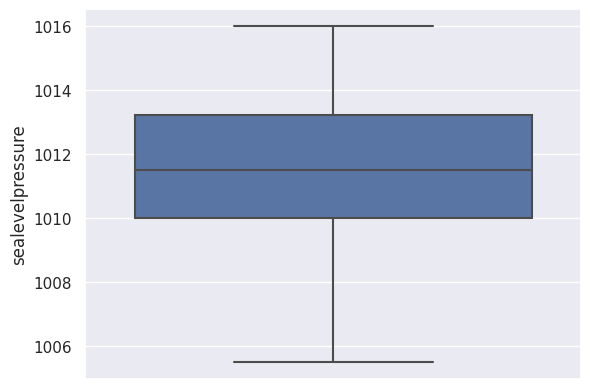

In [497]:
sns.boxplot(data=data,y=data['sealevelpressure'])

In [498]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['sealevelpressure']] = scaler.fit_transform(data[['sealevelpressure']]) 
data['sealevelpressure'].unique()

array([ 1.95192996,  1.52008705,  1.43371847,  0.87232268,  1.17461272,
        1.86556138,  1.47690276,  1.90874567,  1.60645563,  0.82913839,
        0.57003264,  1.04505985,  1.00187556,  0.22455831,  0.26774261,
        0.48366406,  0.7859541 ,  0.91550697,  0.69958552,  0.39729548,
       -0.2072846 , -0.59594322, -0.63912751,  0.3109269 , -0.03454743,
        0.18137402,  0.52684835, -0.46639035, -0.07773172,  0.61321694,
        0.74276981,  0.65640123,  0.00863686,  0.09500544,  0.35411119,
        1.13142843,  1.3041656 ,  1.69282422,  1.34734989,  0.44047977,
       -0.12091602, -0.29365318, -0.72549609, -1.15733901, -1.63236621,
       -1.02778613, -0.6823118 , -1.11415471, -1.2005233 , -0.98460184,
       -0.50957464, -0.42320605, -0.25046889, -0.38002176, -0.55275893,
       -0.76868038, -0.81186468,  0.05182115, -2.02102483, -2.58242062,
       -2.19376199, -1.89147196, -1.84828766, -1.76191908, -1.71873479,
       -1.45962904, -1.41644475, -1.07097042, -1.28689188, -1.93

<Axes: ylabel='Density'>

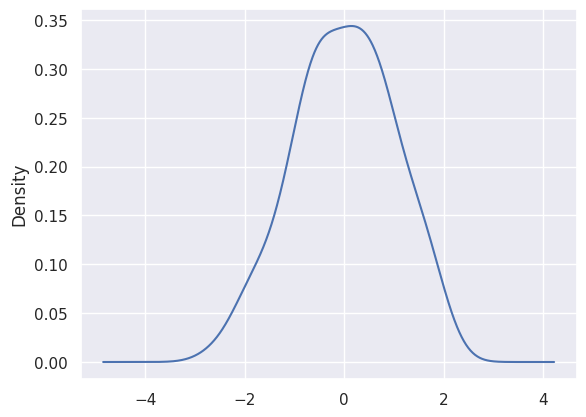

In [499]:
data['sealevelpressure'].plot(kind='kde')

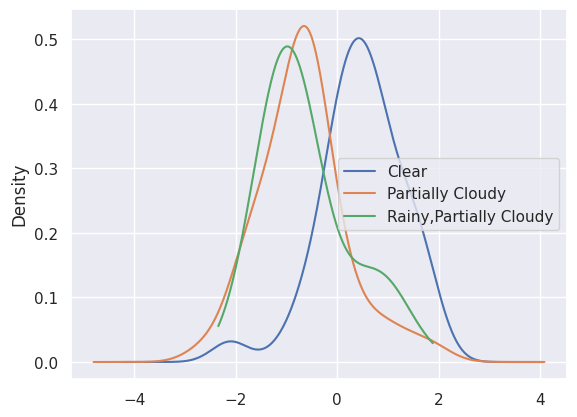

In [500]:
data[data['conditions'] == 0]['sealevelpressure'].plot(kind='kde',label='Clear')
data[data['conditions'] == 1]['sealevelpressure'].plot(kind='kde',label='Partially Cloudy')
data[data['conditions'] == 2]['sealevelpressure'].plot(kind='kde',label='Rainy,Partially Cloudy')
plt.legend()
plt.show()

<Axes: xlabel='conditions', ylabel='sealevelpressure'>

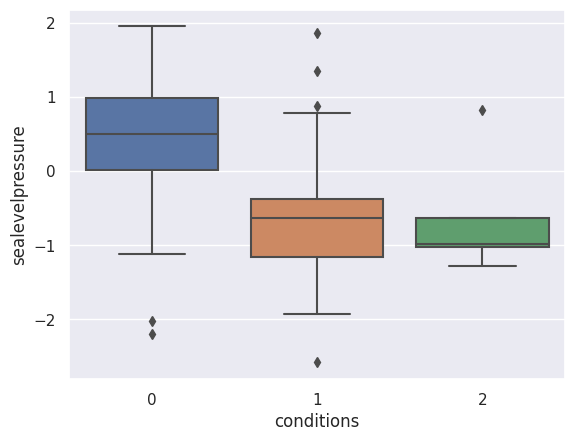

In [501]:
sns.boxplot(data=data,x=data['conditions'],y=data['sealevelpressure'])

##HUMIDITY ANALYSIS

In [502]:
data['humidity'].unique()

array([58.5, 60.4, 64.3, 63.5, 60.8, 58.6, 59.9, 51.3, 40.4, 43.1, 52.2,
       59.4, 67.3, 51.6, 57.2, 66.3, 65.7, 63. , 68.3, 65.4, 60. , 47.6,
       51. , 50.7, 53. , 57.1, 62.8, 67.2, 81.8, 72.1, 62.9, 50.2, 42.2,
       44.4, 48.7, 55. , 53.2, 54.7, 54.3, 46.6, 48.8, 35.2, 39. , 29.9,
       33.2, 38.6, 33.6, 36.4, 29.7, 63.3, 54.5, 61.5, 49.8, 42.9, 35.9,
       39.3, 40.5, 42.8, 38.8, 44.7, 47. , 39.2, 39.7, 41. , 31.1, 24.8,
       32.2, 36.2, 45.3, 58. , 71.6, 75.4, 68.6, 69. , 66.9, 66.6, 68.8,
       58.9, 66.8, 67.5, 70.1, 67. , 69.2, 76.4, 78.5, 53.6, 57.5, 56.3,
       61.1, 63.2, 51.5, 61.4, 61. , 70.6, 54.2, 49.3, 56.5, 72.4, 71.8,
       79.1, 71.3, 65.5, 68.9])

<Axes: ylabel='humidity'>

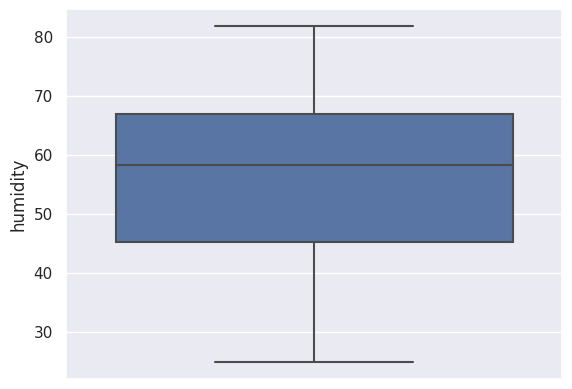

In [503]:
sns.boxplot(data=data,y='humidity')

<Axes: ylabel='Density'>

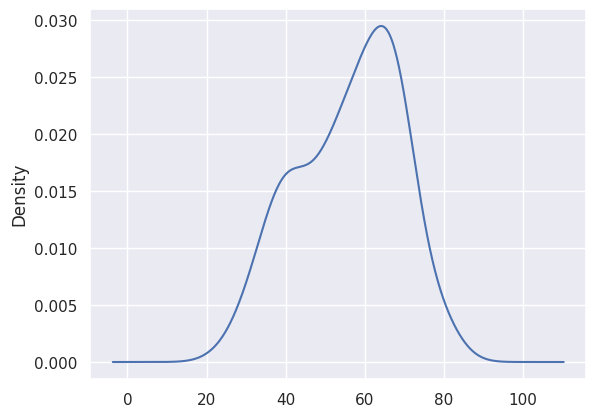

In [504]:
data['humidity'].plot(kind='kde')

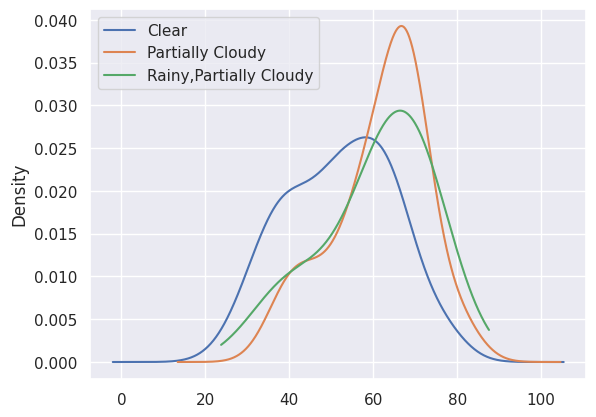

In [505]:
data[data['conditions'] == 0]['humidity'].plot(kind='kde',label='Clear')
data[data['conditions'] == 1]['humidity'].plot(kind='kde',label='Partially Cloudy')
data[data['conditions'] == 2]['humidity'].plot(kind='kde',label='Rainy,Partially Cloudy')
plt.legend()
plt.show()

<Axes: xlabel='conditions', ylabel='humidity'>

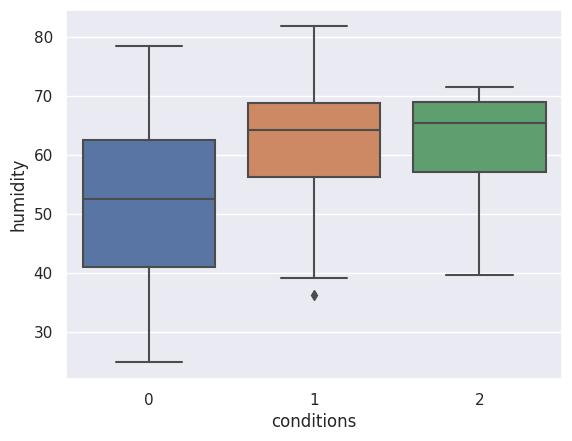

In [506]:
sns.boxplot(x='conditions',y='humidity',data=data)

##MOONPHASE ANALYSIS

In [507]:
data['moonphase'].unique()

array([0.3 , 0.34, 0.37, 0.41, 0.44, 0.48, 0.5 , 0.54, 0.58, 0.61, 0.64,
       0.68, 0.71, 0.75, 0.81, 0.85, 0.88, 0.91, 0.95, 0.98, 0.  , 0.05,
       0.08, 0.11, 0.15, 0.18, 0.25, 0.28, 0.32, 0.35, 0.38, 0.42, 0.45,
       0.52, 0.55, 0.59, 0.62, 0.65, 0.69, 0.72, 0.79, 0.83, 0.86, 0.9 ,
       0.93, 0.96, 0.03, 0.06, 0.1 , 0.13, 0.16, 0.2 , 0.26, 0.29, 0.33,
       0.36, 0.39, 0.43, 0.46, 0.53, 0.56, 0.6 , 0.63, 0.67, 0.7 , 0.74,
       0.84, 0.02, 0.21, 0.31, 0.47, 0.57, 0.82, 0.97, 0.04, 0.07, 0.23])

<Axes: ylabel='moonphase'>

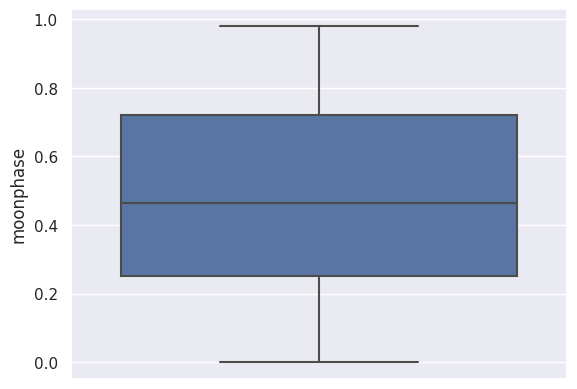

In [508]:
sns.boxplot(data=data,y='moonphase')

<Axes: ylabel='Density'>

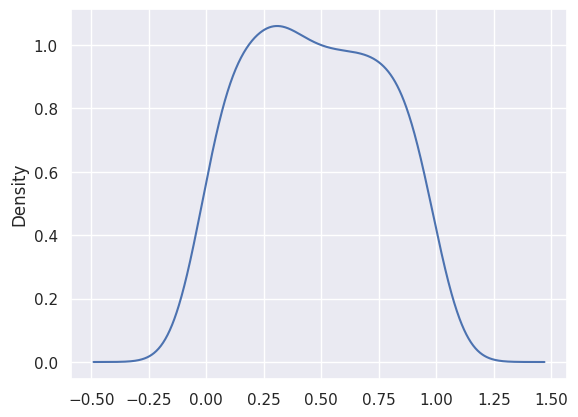

In [509]:
data['moonphase'].plot(kind='kde')

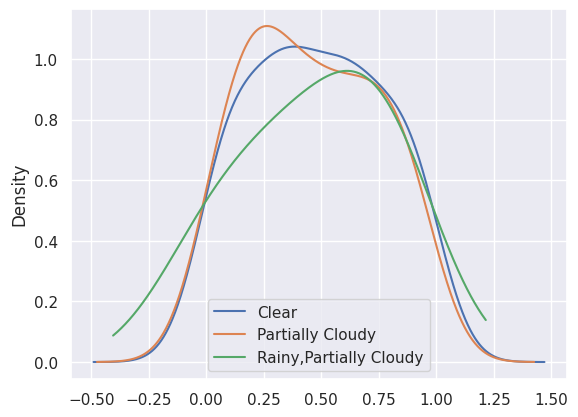

In [510]:
data[data['conditions'] == 0]['moonphase'].plot(kind='kde',label='Clear')
data[data['conditions'] == 1]['moonphase'].plot(kind='kde',label='Partially Cloudy')
data[data['conditions'] == 2]['moonphase'].plot(kind='kde',label='Rainy,Partially Cloudy')
plt.legend()
plt.show()

<Axes: xlabel='conditions', ylabel='moonphase'>

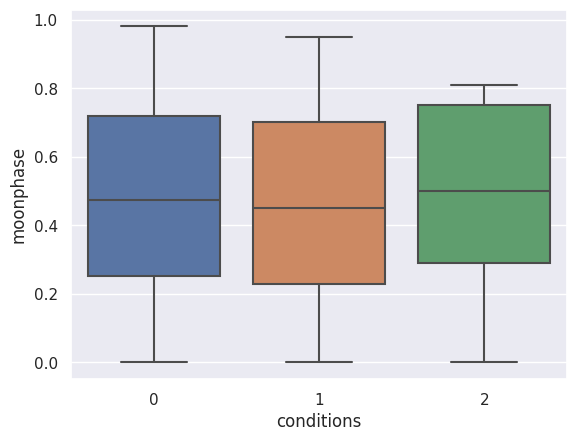

In [511]:
sns.boxplot(x='conditions',y='moonphase',data=data)

##SEVERE RISK ANALYSIS

In [512]:
data['severerisk'].unique()

array([ 10,  30,  15,  60,   8, 100,   5,  75,  38])

In [513]:
data['severerisk']= le.fit_transform(data['severerisk'])
data['severerisk'].unique()

array([2, 4, 3, 6, 1, 8, 0, 7, 5])

In [514]:
pd.crosstab(data['conditions'],data['severerisk'],normalize='columns')*100

severerisk,0,1,2,3,4,5,6,7,8
conditions,,,,,,,,,
0,100.0,0.0,78.75,18.181818,6.666667,33.333333,33.333333,0.0,0.0
1,0.0,100.0,18.75,81.818182,86.666667,33.333333,66.666667,100.0,0.0
2,0.0,0.0,2.50,0.000000,6.666667,33.333333,0.000000,0.0,100.0


<Axes: xlabel='uvindex', ylabel='conditions'>

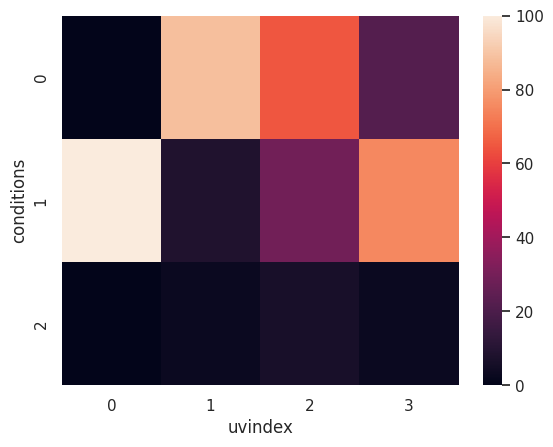

In [515]:
sns.heatmap(pd.crosstab(data['conditions'],data['uvindex'],normalize='columns')*100)

##CORRELATION ANALYSIS

In [516]:
(data.corr())*100

,temp,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,...,cloudcover,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions,PM2.5,SO2,CO
temp,100.000000,29.323240,-23.938185,10.283958,10.283958,10.283958,10.283958,41.002499,37.130659,-23.543668,...,46.093144,52.864130,52.839919,59.408487,46.043514,14.583714,44.904494,-54.711405,34.989374,23.675581
dew,29.323240,100.000000,84.964459,13.119287,13.119287,13.119287,13.119287,-13.435729,24.471350,-26.388969,...,62.118314,37.620146,37.736172,48.602683,45.084663,-16.769757,58.504204,-38.845931,48.182772,-27.856384
humidity,-23.938185,84.964459,100.000000,7.553378,7.553378,7.553378,7.553378,-37.182390,4.294744,-14.253652,...,36.786590,11.297956,11.410818,18.459091,21.627253,-23.188759,33.397899,-10.119817,30.250086,-41.656204
precip,10.283958,13.119287,7.553378,100.000000,100.000000,100.000000,100.000000,-5.572814,30.220853,-19.173528,...,46.779004,-17.371936,-17.354607,0.219806,22.615990,-0.291187,55.824022,-12.451778,-6.182530,-12.391177
precipprob,10.283958,13.119287,7.553378,100.000000,100.000000,100.000000,100.000000,-5.572814,30.220853,-19.173528,...,46.779004,-17.371936,-17.354607,0.219806,22.615990,-0.291187,55.824022,-12.451778,-6.182530,-12.391177
precipcover,10.283958,13.119287,7.553378,100.000000,100.000000,100.000000,100.000000,-5.572814,30.220853,-19.173528,...,46.779004,-17.371936,-17.354607,0.219806,22.615990,-0.291187,55.824022,-12.451778,-6.182530,-12.391177
preciptype,10.283958,13.119287,7.553378,100.000000,100.000000,100.000000,100.000000,-5.572814,30.220853,-19.173528,...,46.779004,-17.371936,-17.354607,0.219806,22.615990,-0.291187,55.824022,-12.451778,-6.182530,-12.391177
windgust,41.002499,-13.435729,-37.182390,-5.572814,-5.572814,-5.572814,-5.572814,100.000000,44.261906,37.645688,...,-1.416379,24.383626,24.757706,30.412828,13.132581,-2.996610,-4.464025,-19.333160,13.639902,5.166516
windspeed,37.130659,24.471350,4.294744,30.220853,30.220853,30.220853,30.220853,44.261906,100.000000,11.677387,...,33.789568,31.940464,32.130786,42.791168,30.463235,0.474496,37.430117,-45.624549,23.134497,-18.496756
winddir,-23.543668,-26.388969,-14.253652,-19.173528,-19.173528,-19.173528,-19.173528,37.645688,11.677387,100.000000,...,-34.584669,-1.490424,-1.076313,-2.292074,-25.452706,1.553730,-31.894162,8.103963,-9.668809,-9.545585


<Axes: >

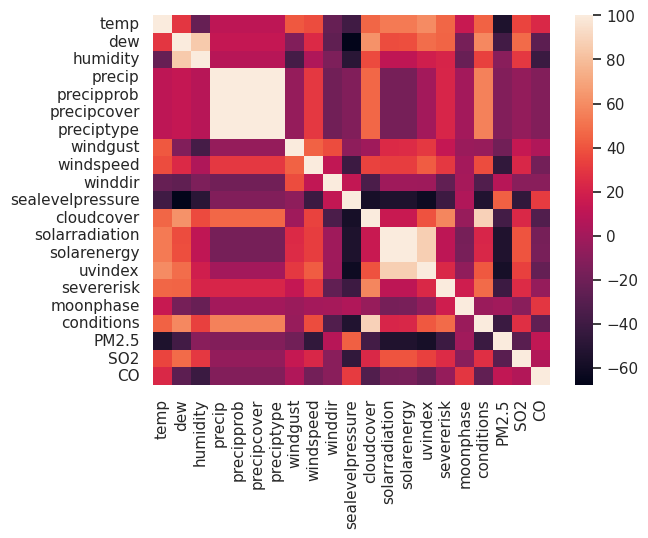

In [517]:
sns.heatmap((data.corr())*100)

CONCLUSION: Precip, precipprb, precipcover and preciptype show similar correlation, hence we can drop precipprob, precipcover and preciptype.

In [518]:
data.drop(['precipcover','preciptype','precipprob'],axis=1,inplace=True)

<Axes: >

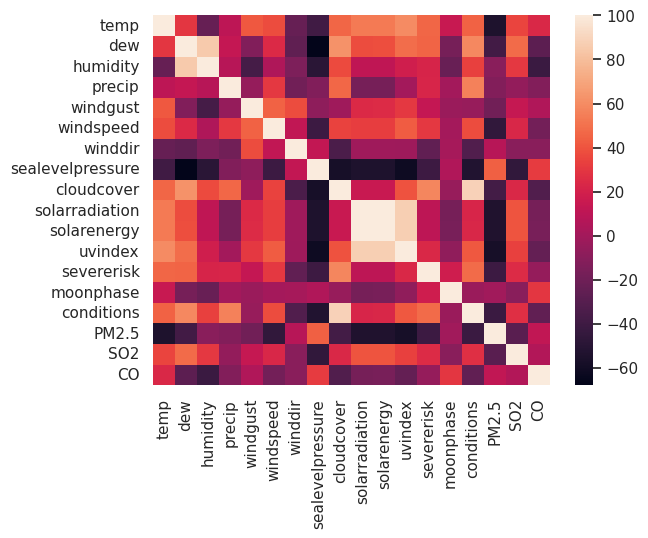

In [519]:
sns.heatmap((data.corr())*100)

##BIVARIATE ANALYSIS FOR SOLAR ENERGY AND SOLAR RADIATION WITH TEMPERATURE

<Axes: xlabel='temp', ylabel='solarenergy'>

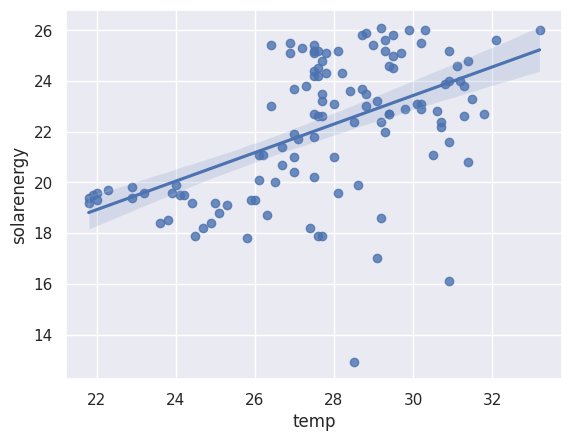

In [520]:
sns.regplot(x=data['temp'],y=data['solarenergy'],data=data)

<Axes: xlabel='temp', ylabel='solarradiation'>

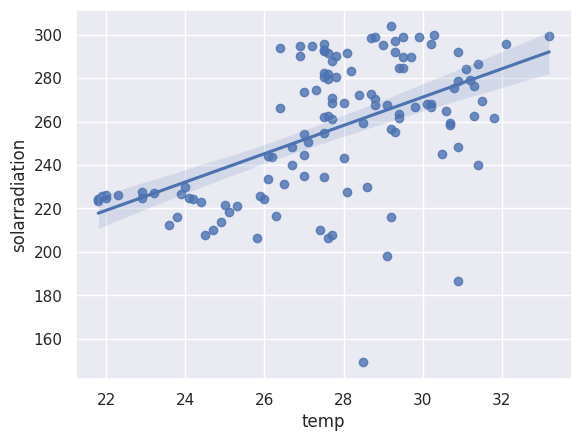

In [521]:
sns.regplot(x=data['temp'],y=data['solarradiation'],data=data)

CONCLUSION: BOTH SOLAR RADIATION AND SOLAR ENERGY SHOW SAME CORRELATION WITH TEMP AND OTHER FEATURES, HENCE WE DROP SOLAR ENERGY

In [522]:
data.drop('solarenergy',axis=1,inplace=True)

<Axes: >

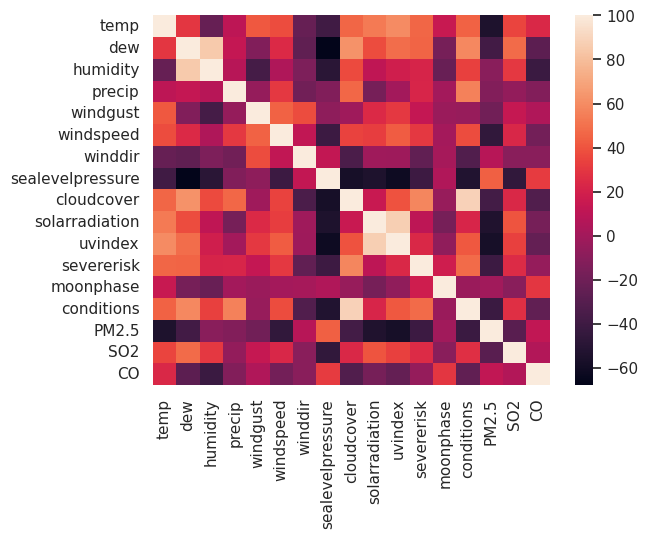

In [523]:
sns.heatmap((data.corr())*100)

##BIVARIATE AND MULTIVARIATE ANALYSIS FOR AIR QUALITY VARIABLES

<Axes: xlabel='PM2.5', ylabel='SO2'>

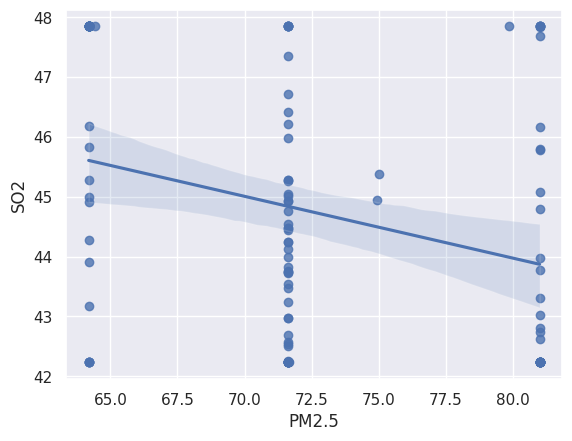

In [524]:
sns.regplot(x=data['PM2.5'],y=data['SO2'],data=data)

<Axes: xlabel='PM2.5', ylabel='CO'>

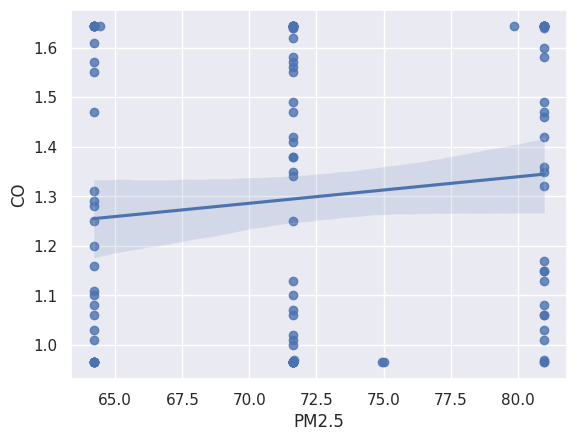

In [525]:
sns.regplot(x=data['PM2.5'],y=data['CO'],data=data)

<Axes: xlabel='CO', ylabel='SO2'>

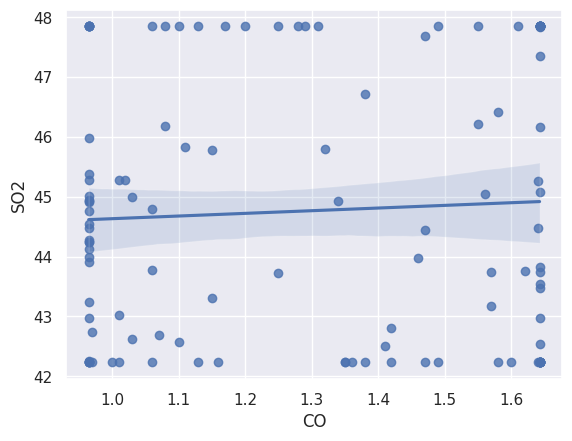

In [526]:
sns.regplot(x=data['CO'],y=data['SO2'],data=data)

Text(0.5, 0, 'CO')

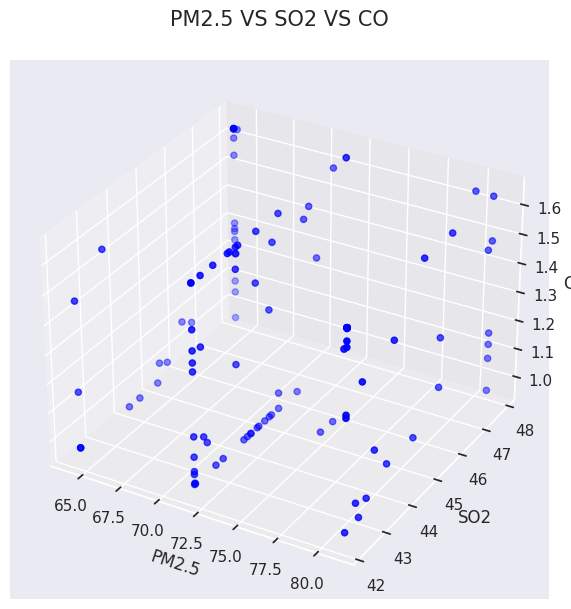

In [527]:
from mpl_toolkits import mplot3d
sns.set(style='darkgrid')

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

x=data['PM2.5']
y=data['SO2']
z=data['CO']

ax.scatter3D(x, y, z, color='blue')
ax.set_title("PM2.5 VS SO2 VS CO", pad=25, size=15)
ax.set_xlabel('PM2.5') 
ax.set_ylabel('SO2') 
ax.set_zlabel('CO')

<Axes: >

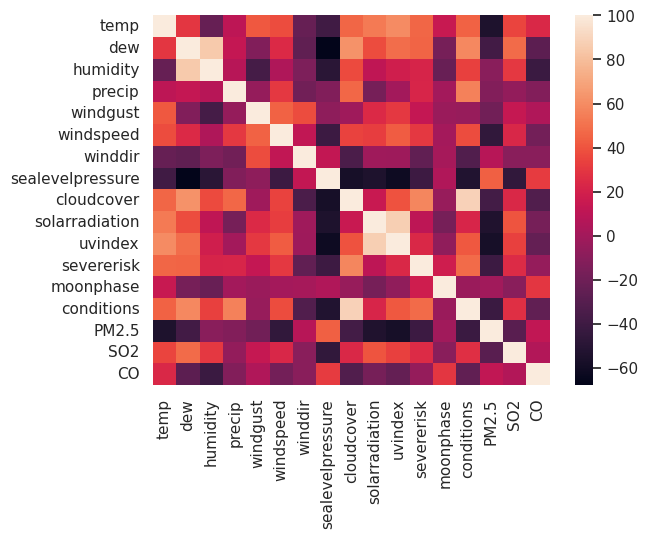

In [528]:
sns.heatmap((data.corr())*100)

CONCLUSION: THERE IS NO CORRELATION BETWEEN AIR QUALITY VARIABLES

##MULTIVARIATE ANALYSIS BETWEEN SUITABLE WEATHER PARAMETERS AND AQI VARIABLES

Text(0.5, 0, 'PM2.5')

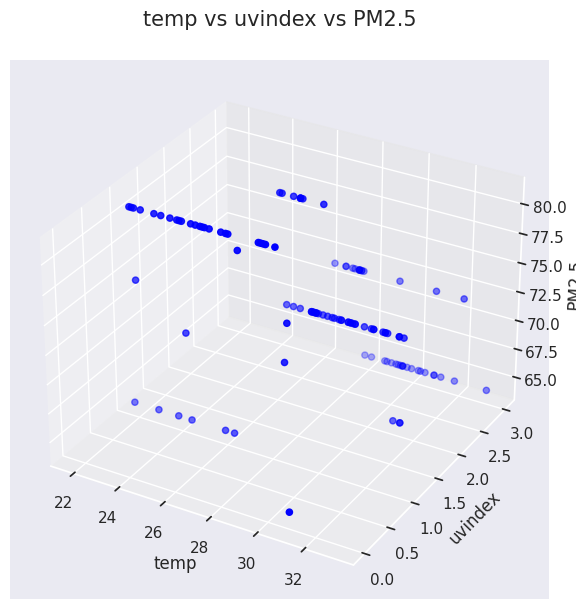

In [529]:
from mpl_toolkits import mplot3d
sns.set(style='darkgrid')

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

x=data['temp']
y=data['uvindex']
z=data['PM2.5']

ax.scatter3D(x, y, z, color='blue')
ax.set_title("temp vs uvindex vs PM2.5", pad=25, size=15)
ax.set_xlabel('temp') 
ax.set_ylabel('uvindex') 
ax.set_zlabel('PM2.5')

Text(0.5, 0, 'SO2')

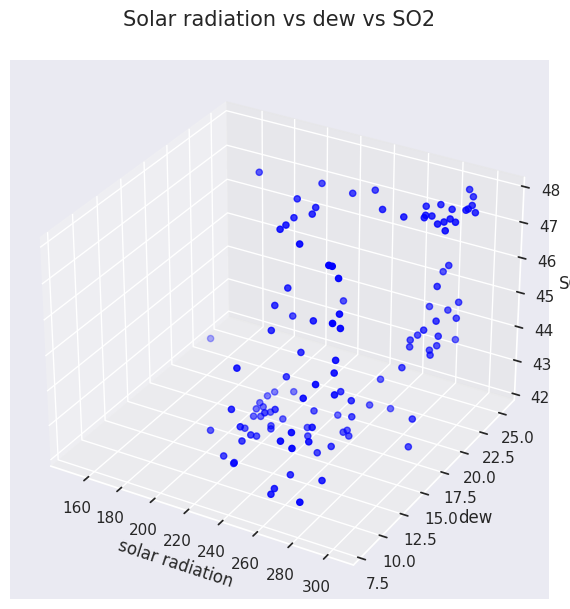

In [530]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

x=data['solarradiation']
y=data['dew']
z=data['SO2']

ax.scatter3D(x, y, z, color='blue')
ax.set_title("Solar radiation vs dew vs SO2", pad=25, size=15)
ax.set_xlabel('solar radiation') 
ax.set_ylabel('dew') 
ax.set_zlabel('SO2')

Text(0.5, 0, 'CO')

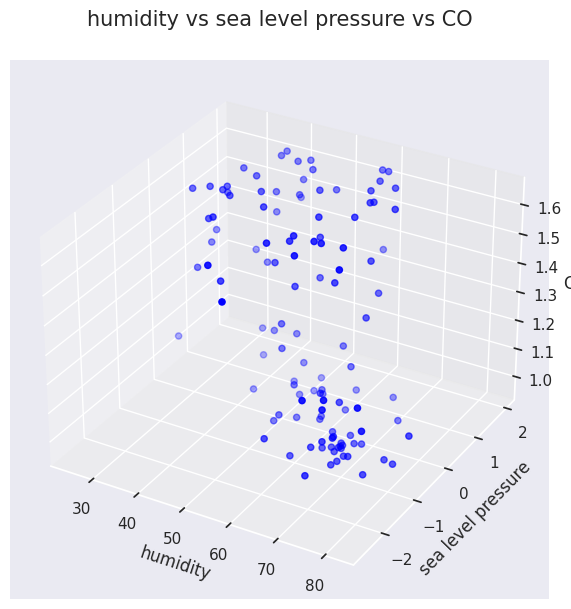

In [531]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

x=data['humidity']
y=data['sealevelpressure']
z=data['CO']

ax.scatter3D(x, y, z, color='blue')
ax.set_title("humidity vs sea level pressure vs CO", pad=25, size=15)
ax.set_xlabel('humidity') 
ax.set_ylabel('sea level pressure') 
ax.set_zlabel('CO')

CONCLUSION: RELATIONSHIP OF WEATHER PARAMETERS AND AQI VARIABLES IS NON LINEAR

##ANALYZING IMPORTANT FEATURES FOR PREDICTING AQI VARIABLES USING RANDOM FOREST REGRESSOR

Text(0.5, 1.0, 'Visualizing Important Features For PM2.5')

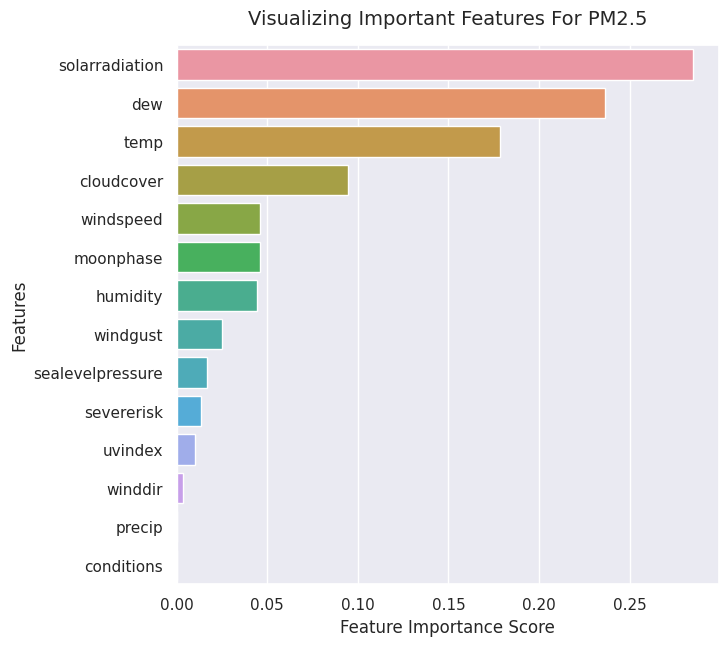

In [532]:
from sklearn.ensemble import RandomForestRegressor

X = data.drop(['PM2.5','SO2','CO'],axis=1)

Y = data['PM2.5']

rf = RandomForestRegressor(n_estimators=100, max_depth=12, min_samples_split=13, random_state=1)

rf.fit(X, Y)

a=[]
for i in X:
  a.append(i)

fig = plt.figure(figsize=(7, 7))

feature_imp = pd.Series(rf.feature_importances_, 
                        index=a).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features For PM2.5", pad=15, size=14)

Text(0.5, 1.0, 'Visualizing Important Features For SO2')

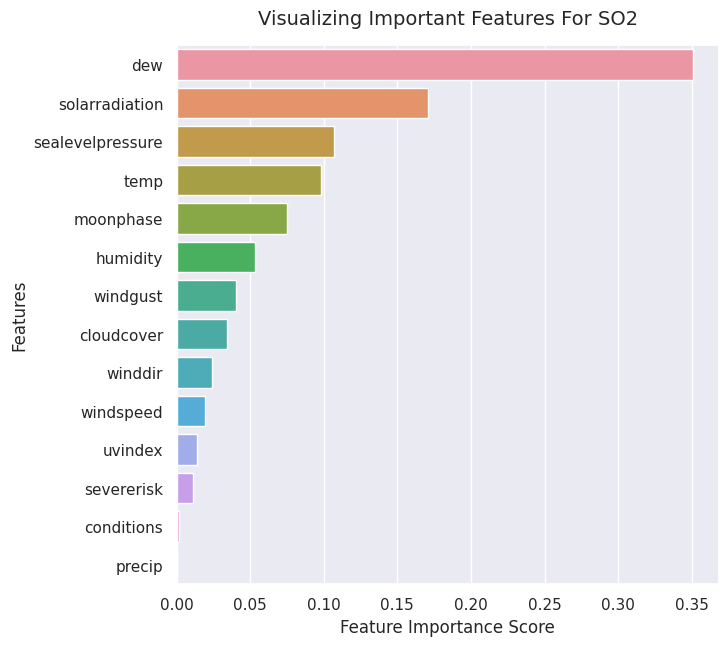

In [533]:
from sklearn.ensemble import RandomForestRegressor

X = data.drop(['PM2.5','SO2','CO'],axis=1)

Y = data['SO2']

rf = RandomForestRegressor(n_estimators=100, max_depth=12, min_samples_split=13, random_state=1)

rf.fit(X, Y)

a=[]
for i in X:
  a.append(i)

fig = plt.figure(figsize=(7, 7))

feature_imp = pd.Series(rf.feature_importances_, 
                        index=a).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features For SO2", pad=15, size=14)

Text(0.5, 1.0, 'Visualizing Important Features For CO')

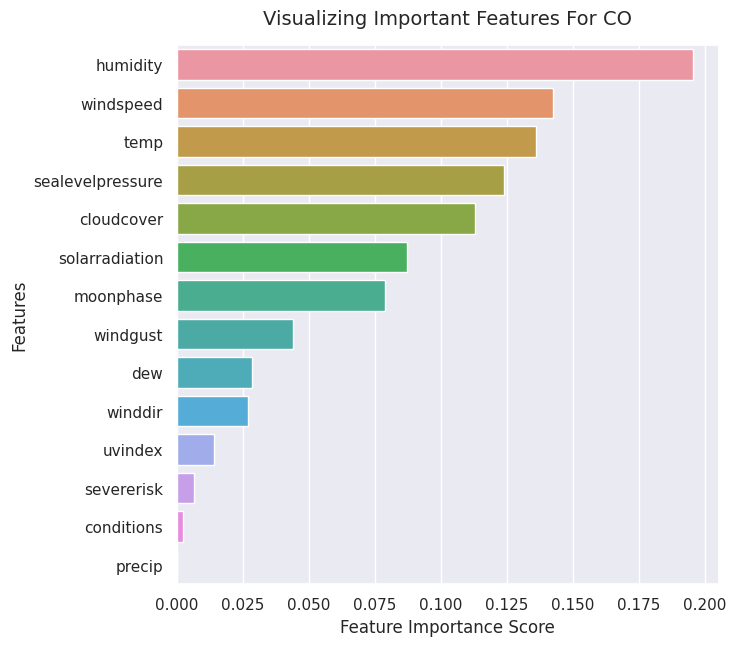

In [534]:
from sklearn.ensemble import RandomForestRegressor

X = data.drop(['PM2.5','SO2','CO'],axis=1)

Y = data['CO']

rf = RandomForestRegressor(n_estimators=100, max_depth=12, min_samples_split=13, random_state=1)

rf.fit(X, Y)

a=[]
for i in X:
  a.append(i)

fig = plt.figure(figsize=(7, 7))

feature_imp = pd.Series(rf.feature_importances_, 
                        index=a).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features For CO", pad=15, size=14)

##MODEL TRAINING AND TESTING TO PREDICT AQI VARIABLES WITH LINEAR REGRESSION

**PREDICTING PM2.5 USING LINEAR REGRESSION**

In [535]:
x=data[['solarradiation','dew','temp','cloudcover','windspeed','moonphase','humidity']]
y=data[['PM2.5']]

In [536]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

reg = LinearRegression()

reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mse

27.742360191470382

<Axes: ylabel='PM2.5'>

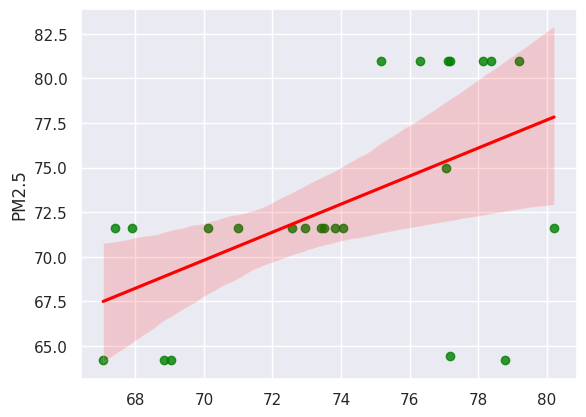

In [537]:
sns.regplot(x=y_pred, y=y_test, scatter_kws={"color":"green"}, line_kws={"color":"red"})

**PREDICTING SO2 USING LINEAR REGRESSION**

In [538]:
x=data[['dew','solarradiation','sealevelpressure','temp','moonphase','humidity','windgust','cloudcover']]
y=data[['SO2']]

In [539]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

reg = LinearRegression()

reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mse

5.624131956566187

<Axes: ylabel='SO2'>

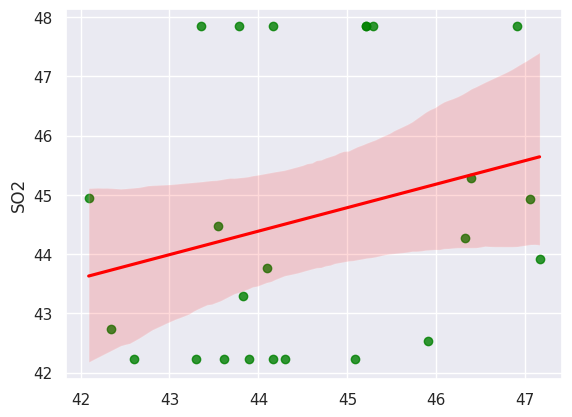

In [540]:
sns.regplot(x=y_pred, y=y_test, scatter_kws={"color":"green"}, line_kws={"color":"red"})

**PREDICTING CO USING LINEAR REGRESSION**

In [541]:
x=data[['humidity','windspeed','temp','sealevelpressure','cloudcover','solarradiation','moonphase','windgust']]
y=data[['CO']]

In [542]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

reg = LinearRegression()

reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mse

0.044219859542296215

<Axes: ylabel='CO'>

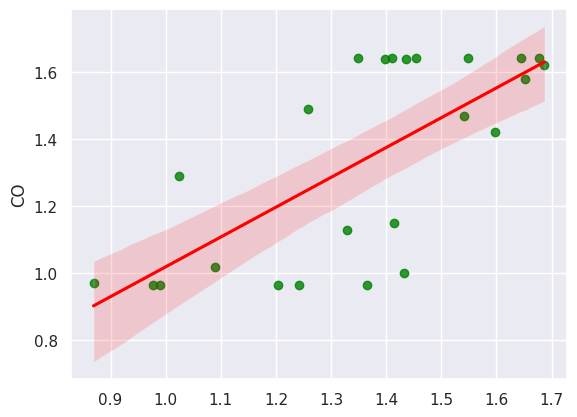

In [543]:
sns.regplot(x=y_pred, y=y_test, scatter_kws={"color":"green"}, line_kws={"color":"red"})

CONCLUSION: HENCE PM2.5, SO2 AND CO AQI CANNOT BE PREDICTED EFFICIENTLY WITH THE WEATHER PARAMETERS **USING LINEAR REGRESSION**. SIMILARLY, ANY OTHER AQI CANNOT BE PREDICTED WITH WEATHER PARAMETERS **USING LINEAR REGRESSION**

##MODEL TRAINING AND TESTING TO PREDICT AQI VARIABLES USING RANDOM FOREST REGRESSOR

**PREDICTING PM2.5 USING RANDOM FOREST REGRESSOR**

In [544]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz

X = data[['solarradiation','dew','temp','cloudcover','windspeed','moonphase','humidity']] 
Y = data['PM2.5']

rf = RandomForestRegressor(n_estimators=100, max_depth=2, min_samples_split=2, random_state=1)

rf.fit(X, Y)

dot_data = export_graphviz(rf.estimators_[0], feature_names=['temp','windspeed','cloudcover','sealevelpressure','solarradiation','uvindex','dew'],  
                           filled=True, rounded=True)  

graph = graphviz.Source(dot_data, format='png')
graph.render("PM2.5_tree") 

'PM2.5_tree.png'

NOTE: CHECK FILES (YOUR CURRENT WORKING DIRECTORY) TO SEE THE OUTPUT OF THE ABOVE DECISION TREE OR CHECK THE NEXT CELL

[Text(0.5, 0.8333333333333334, 'x[0] <= 246.3\nsquared_error = 39.604\nsamples = 74\nvalue = 72.102'),
 Text(0.25, 0.5, 'x[5] <= 0.66\nsquared_error = 46.068\nsamples = 29\nvalue = 76.897'),
 Text(0.125, 0.16666666666666666, 'squared_error = 24.418\nsamples = 20\nvalue = 79.241'),
 Text(0.375, 0.16666666666666666, 'squared_error = 47.739\nsamples = 9\nvalue = 70.256'),
 Text(0.75, 0.5, 'x[1] <= 21.35\nsquared_error = 12.41\nsamples = 45\nvalue = 69.122'),
 Text(0.625, 0.16666666666666666, 'squared_error = 1.132\nsamples = 30\nvalue = 71.483'),
 Text(0.875, 0.16666666666666666, 'squared_error = 3.939\nsamples = 15\nvalue = 64.763')]

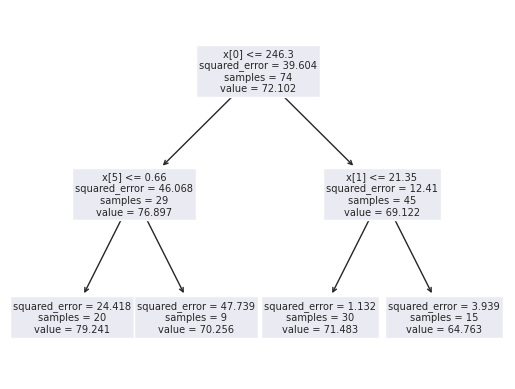

In [545]:
from sklearn import tree
tree.plot_tree(rf.estimators_[0])

GRAPHVIZ HAS A BETTER VISUALIZATION IN THIS CASE SINCE IT REPLACES 'X[n]' WITH THE ACTUAL COLUMN NAME. SO IT IS RECOMMENDED TO CHECK THAT ONE OUT.

In the above random forest, the max depth and min_samples_split is completely random. However it is possible that a better max depth and min_samples_split will make a better model. Hence we will be using hyperparameter tuning (here we used RandomizedSearchCV) and find the best parameter to train the model on.

In [546]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=2, shuffle=True)

model = RandomForestRegressor()

rs = RandomizedSearchCV(model, n_iter=10, param_distributions = {'max_depth': range(1, 15), 'min_samples_split': range(2, 50)},
                        cv=5, n_jobs=-1, random_state=3,
                        scoring='neg_mean_squared_error')

rs.fit(X_train, y_train)

print(rs.best_params_)
print(-rs.best_score_) #since we used negative mean squared errOr we add '-'

{'min_samples_split': 2, 'max_depth': 8}
16.92411009799288


[Text(0.5131578947368421, 0.9166666666666666, 'x[0] <= 246.3\nsquared_error = 39.604\nsamples = 74\nvalue = 72.102'),
 Text(0.2894736842105263, 0.75, 'x[5] <= 0.66\nsquared_error = 46.068\nsamples = 29\nvalue = 76.897'),
 Text(0.15789473684210525, 0.5833333333333334, 'x[1] <= 13.6\nsquared_error = 24.418\nsamples = 20\nvalue = 79.241'),
 Text(0.10526315789473684, 0.4166666666666667, 'x[2] <= 22.35\nsquared_error = 44.072\nsamples = 4\nvalue = 69.042'),
 Text(0.05263157894736842, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 81.0'),
 Text(0.15789473684210525, 0.25, 'x[3] <= 35.0\nsquared_error = 10.401\nsamples = 3\nvalue = 66.052'),
 Text(0.10526315789473684, 0.08333333333333333, 'squared_error = 0.0\nsamples = 2\nvalue = 64.19'),
 Text(0.21052631578947367, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 71.638'),
 Text(0.21052631578947367, 0.4166666666666667, 'squared_error = 0.0\nsamples = 16\nvalue = 81.0'),
 Text(0.42105263157894735, 0.5833333333333334, 'x[4] <= 

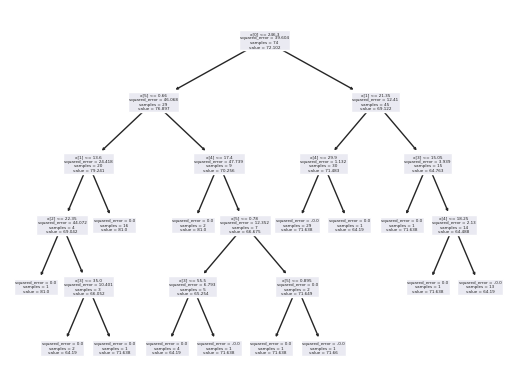

In [547]:
from sklearn import tree

X = data[['solarradiation','dew','temp','cloudcover','windspeed','moonphase','humidity']] 
Y = data['PM2.5']

rf = RandomForestRegressor(n_estimators=100, max_depth=rs.best_params_.get('max_depth'), min_samples_split=rs.best_params_.get('min_samples_split'), random_state=1)

rf.fit(X, Y)

dot_data = export_graphviz(rf.estimators_[0], feature_names=['solarradiation','dew','temp','cloudcover','windspeed','moonphase','humidity'],  
                           filled=True, rounded=True)  

graph = graphviz.Source(dot_data, format='png')
graph.render("PM2.5_optimized_tree") 

tree.plot_tree(rf.estimators_[0])

NOTE: AGAIN IT IS RECOMMENDED TO CHECK OUT THE .PNG FILE FROM GRAPHVIZ

**PREDICTING SO2 USING RANDOM FOREST REGRESSOR**

In [548]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz

X = data[['dew','solarradiation','sealevelpressure','temp','moonphase','humidity','windgust','cloudcover']]
Y = data[['SO2']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=2, shuffle=True)

model = RandomForestRegressor()

rs = RandomizedSearchCV(model, n_iter=10, param_distributions = {'max_depth': range(1, 15), 'min_samples_split': range(2, 50)},
                        cv=5, n_jobs=-1, random_state=3,
                        scoring='neg_mean_squared_error')

rs.fit(X_train, y_train)

print(rs.best_params_)
print(-rs.best_score_)

{'min_samples_split': 2, 'max_depth': 8}
3.1175363629857493


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


[Text(0.6194196428571429, 0.9444444444444444, 'x[0] <= 20.55\nsquared_error = 5.249\nsamples = 74\nvalue = 44.868'),
 Text(0.33035714285714285, 0.8333333333333334, 'x[4] <= 0.36\nsquared_error = 4.208\nsamples = 48\nvalue = 43.995'),
 Text(0.15178571428571427, 0.7222222222222222, 'x[4] <= 0.12\nsquared_error = 5.107\nsamples = 18\nvalue = 45.155'),
 Text(0.07142857142857142, 0.6111111111111112, 'x[2] <= 0.16\nsquared_error = 0.521\nsamples = 7\nvalue = 43.055'),
 Text(0.03571428571428571, 0.5, 'x[3] <= 27.2\nsquared_error = 0.266\nsamples = 3\nvalue = 43.605'),
 Text(0.017857142857142856, 0.3888888888888889, 'squared_error = 0.0\nsamples = 1\nvalue = 42.98'),
 Text(0.05357142857142857, 0.3888888888888889, 'x[0] <= 17.95\nsquared_error = 0.105\nsamples = 2\nvalue = 43.918'),
 Text(0.03571428571428571, 0.2777777777777778, 'squared_error = 0.0\nsamples = 1\nvalue = 43.73'),
 Text(0.07142857142857142, 0.2777777777777778, 'squared_error = 0.0\nsamples = 1\nvalue = 44.48'),
 Text(0.107142857

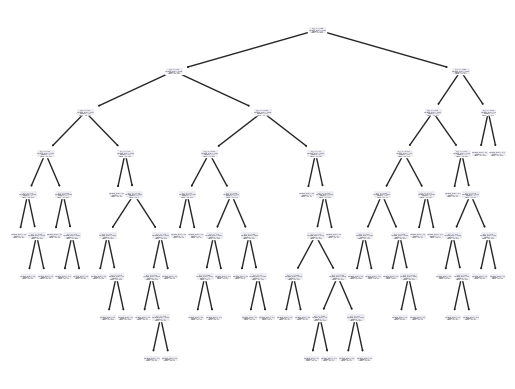

In [549]:
from sklearn import tree

X = data[['dew','solarradiation','sealevelpressure','temp','moonphase','humidity','windgust','cloudcover']] 
Y = data['SO2']

rf = RandomForestRegressor(n_estimators=100, max_depth=rs.best_params_.get('max_depth'), min_samples_split=rs.best_params_.get('min_samples_split'), random_state=1)

rf.fit(X, Y)

dot_data = export_graphviz(rf.estimators_[0], feature_names=['dew','solarradiation','sealevelpressure','temp','moonphase','humidity','windgust','cloudcover'],  
                           filled=True, rounded=True)  

graph = graphviz.Source(dot_data, format='png')
graph.render("SO2_optimized_tree") 

tree.plot_tree(rf.estimators_[0])

**PREDICTING CO USING RANDOM FOREST REGRESSOR**

In [550]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz

X = data[['humidity','windspeed','temp','sealevelpressure','cloudcover','solarradiation','moonphase','windgust']]
Y = data[['CO']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=2, shuffle=True)

model = RandomForestRegressor()

rs = RandomizedSearchCV(model, n_iter=10, param_distributions = {'max_depth': range(1, 15), 'min_samples_split': range(2, 50)},
                        cv=5, n_jobs=-1, random_state=3,
                        scoring='neg_mean_squared_error')

rs.fit(X_train, y_train)

print(rs.best_params_)
print(-rs.best_score_)

{'min_samples_split': 2, 'max_depth': 8}
0.041364784176646005


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


[Text(0.5217161016949152, 0.9444444444444444, 'x[0] <= 63.9\nsquared_error = 0.082\nsamples = 74\nvalue = 1.303'),
 Text(0.2616525423728814, 0.8333333333333334, 'x[2] <= 24.45\nsquared_error = 0.066\nsamples = 48\nvalue = 1.42'),
 Text(0.07627118644067797, 0.7222222222222222, 'x[1] <= 17.7\nsquared_error = 0.048\nsamples = 7\nvalue = 1.139'),
 Text(0.03389830508474576, 0.6111111111111112, 'x[4] <= 7.45\nsquared_error = 0.02\nsamples = 2\nvalue = 1.501'),
 Text(0.01694915254237288, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 1.642'),
 Text(0.05084745762711865, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 1.36'),
 Text(0.11864406779661017, 0.6111111111111112, 'x[3] <= 0.635\nsquared_error = 0.007\nsamples = 5\nvalue = 1.035'),
 Text(0.0847457627118644, 0.5, 'x[0] <= 55.05\nsquared_error = 0.002\nsamples = 2\nvalue = 1.127'),
 Text(0.06779661016949153, 0.3888888888888889, 'squared_error = 0.0\nsamples = 1\nvalue = 1.06'),
 Text(0.1016949152542373, 0.3888888888888889, 'squared_error

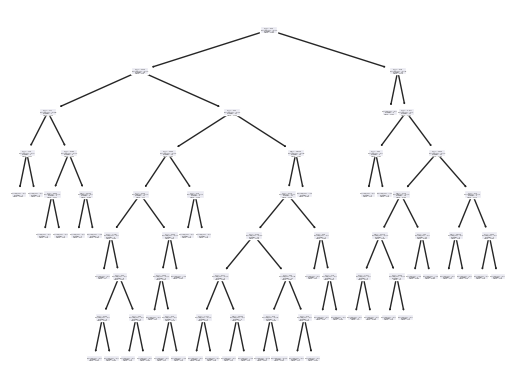

In [551]:
from sklearn import tree

X = data[['humidity','windspeed','temp','sealevelpressure','cloudcover','solarradiation','moonphase','windgust']] 
Y = data['CO']

rf = RandomForestRegressor(n_estimators=100, max_depth=rs.best_params_.get('max_depth'), min_samples_split=rs.best_params_.get('min_samples_split'), random_state=1)

rf.fit(X, Y)

dot_data = export_graphviz(rf.estimators_[0], feature_names=['humidity','windspeed','temp','sealevelpressure','cloudcover','solarradiation','moonphase','windgust'],  
                           filled=True, rounded=True)  

graph = graphviz.Source(dot_data, format='png')
graph.render("CO_optimized_tree") 

tree.plot_tree(rf.estimators_[0])

CONCLUSION: RANDOM FOREST REGRESSOR IS A **MORE EFFICIENT** MODEL THAN LINEAR REGRESSION TO PREDICT AQI VARIABLES. HOWEVER IT IS **STILL DIFFICULT** TO PREDICT AQI VARIABLES FROM WEATHER PARAMETERS.

##MODEL TRAINING AND TESTING TO PREDICT 'CONDITIONS' USING GAUSSIAN NAIVE BAYES CLASSIFIER

In [552]:
x=data[['temp','windspeed','cloudcover','sealevelpressure','solarradiation','uvindex','precip']]
y=data[['conditions']]

In [553]:
from sklearn.naive_bayes import GaussianNB

X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

gnb = GaussianNB()

gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)

accuracy = gnb.score(X_train, y_train)
print('Accuracy on train:',accuracy)
accuracy = gnb.score(X_test, y_test)
print('Accuracy on test:',accuracy)

confusion_matrix(y_test, y_pred)

Accuracy on train: 0.9166666666666666
Accuracy on test: 0.9583333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[14,  1,  0],
       [ 0,  8,  0],
       [ 0,  0,  1]])

<Axes: ylabel='conditions'>

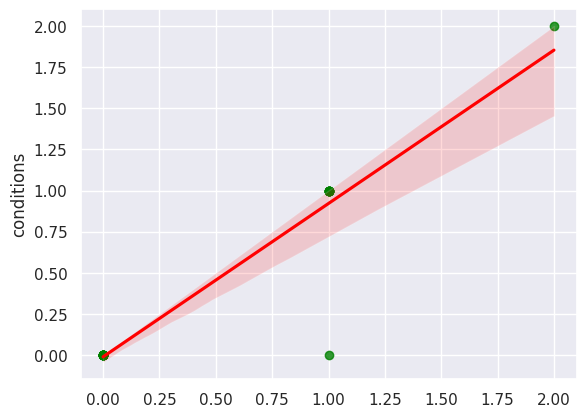

In [554]:
sns.regplot(x=y_pred, y=y_test, scatter_kws={"color":"green"}, line_kws={"color":"red"})

##MODEL TRAINING AND TESTING TO PREDICT 'CONDITIONS' USING LINEAR REGRESSION

In [555]:
X1 = data[['cloudcover','PM2.5','severerisk','uvindex','sealevelpressure','winddir','windspeed','precip','humidity','dew','temp']]
y1 = data[['conditions']]

In [556]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2,random_state=0)

reg = LinearRegression()

reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mse

0.04431292775034129

<Axes: ylabel='conditions'>

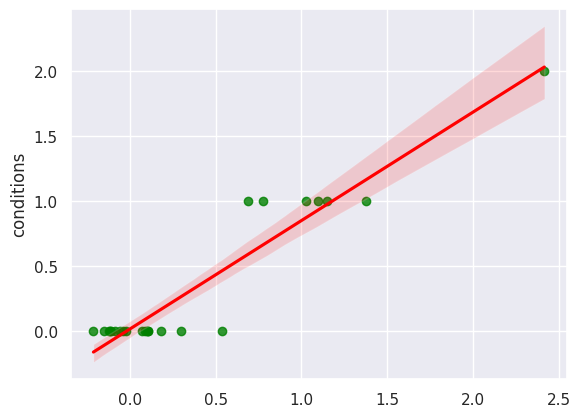

In [557]:
sns.regplot(x=y_pred, y=y_test, scatter_kws={"color":"green"}, line_kws={"color":"red"})

##MODEL TRAINING AND TESTING TO PREDICT 'CONDITIONS' USING DECISION TREE CLASSIFIER

In [558]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
val = data1['conditions'].unique()
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

tree = DecisionTreeClassifier()

tree.fit(X_train,y_train)

y_pred =tree.predict(X_test)

accuracy_score(y_test,y_pred)

1.0

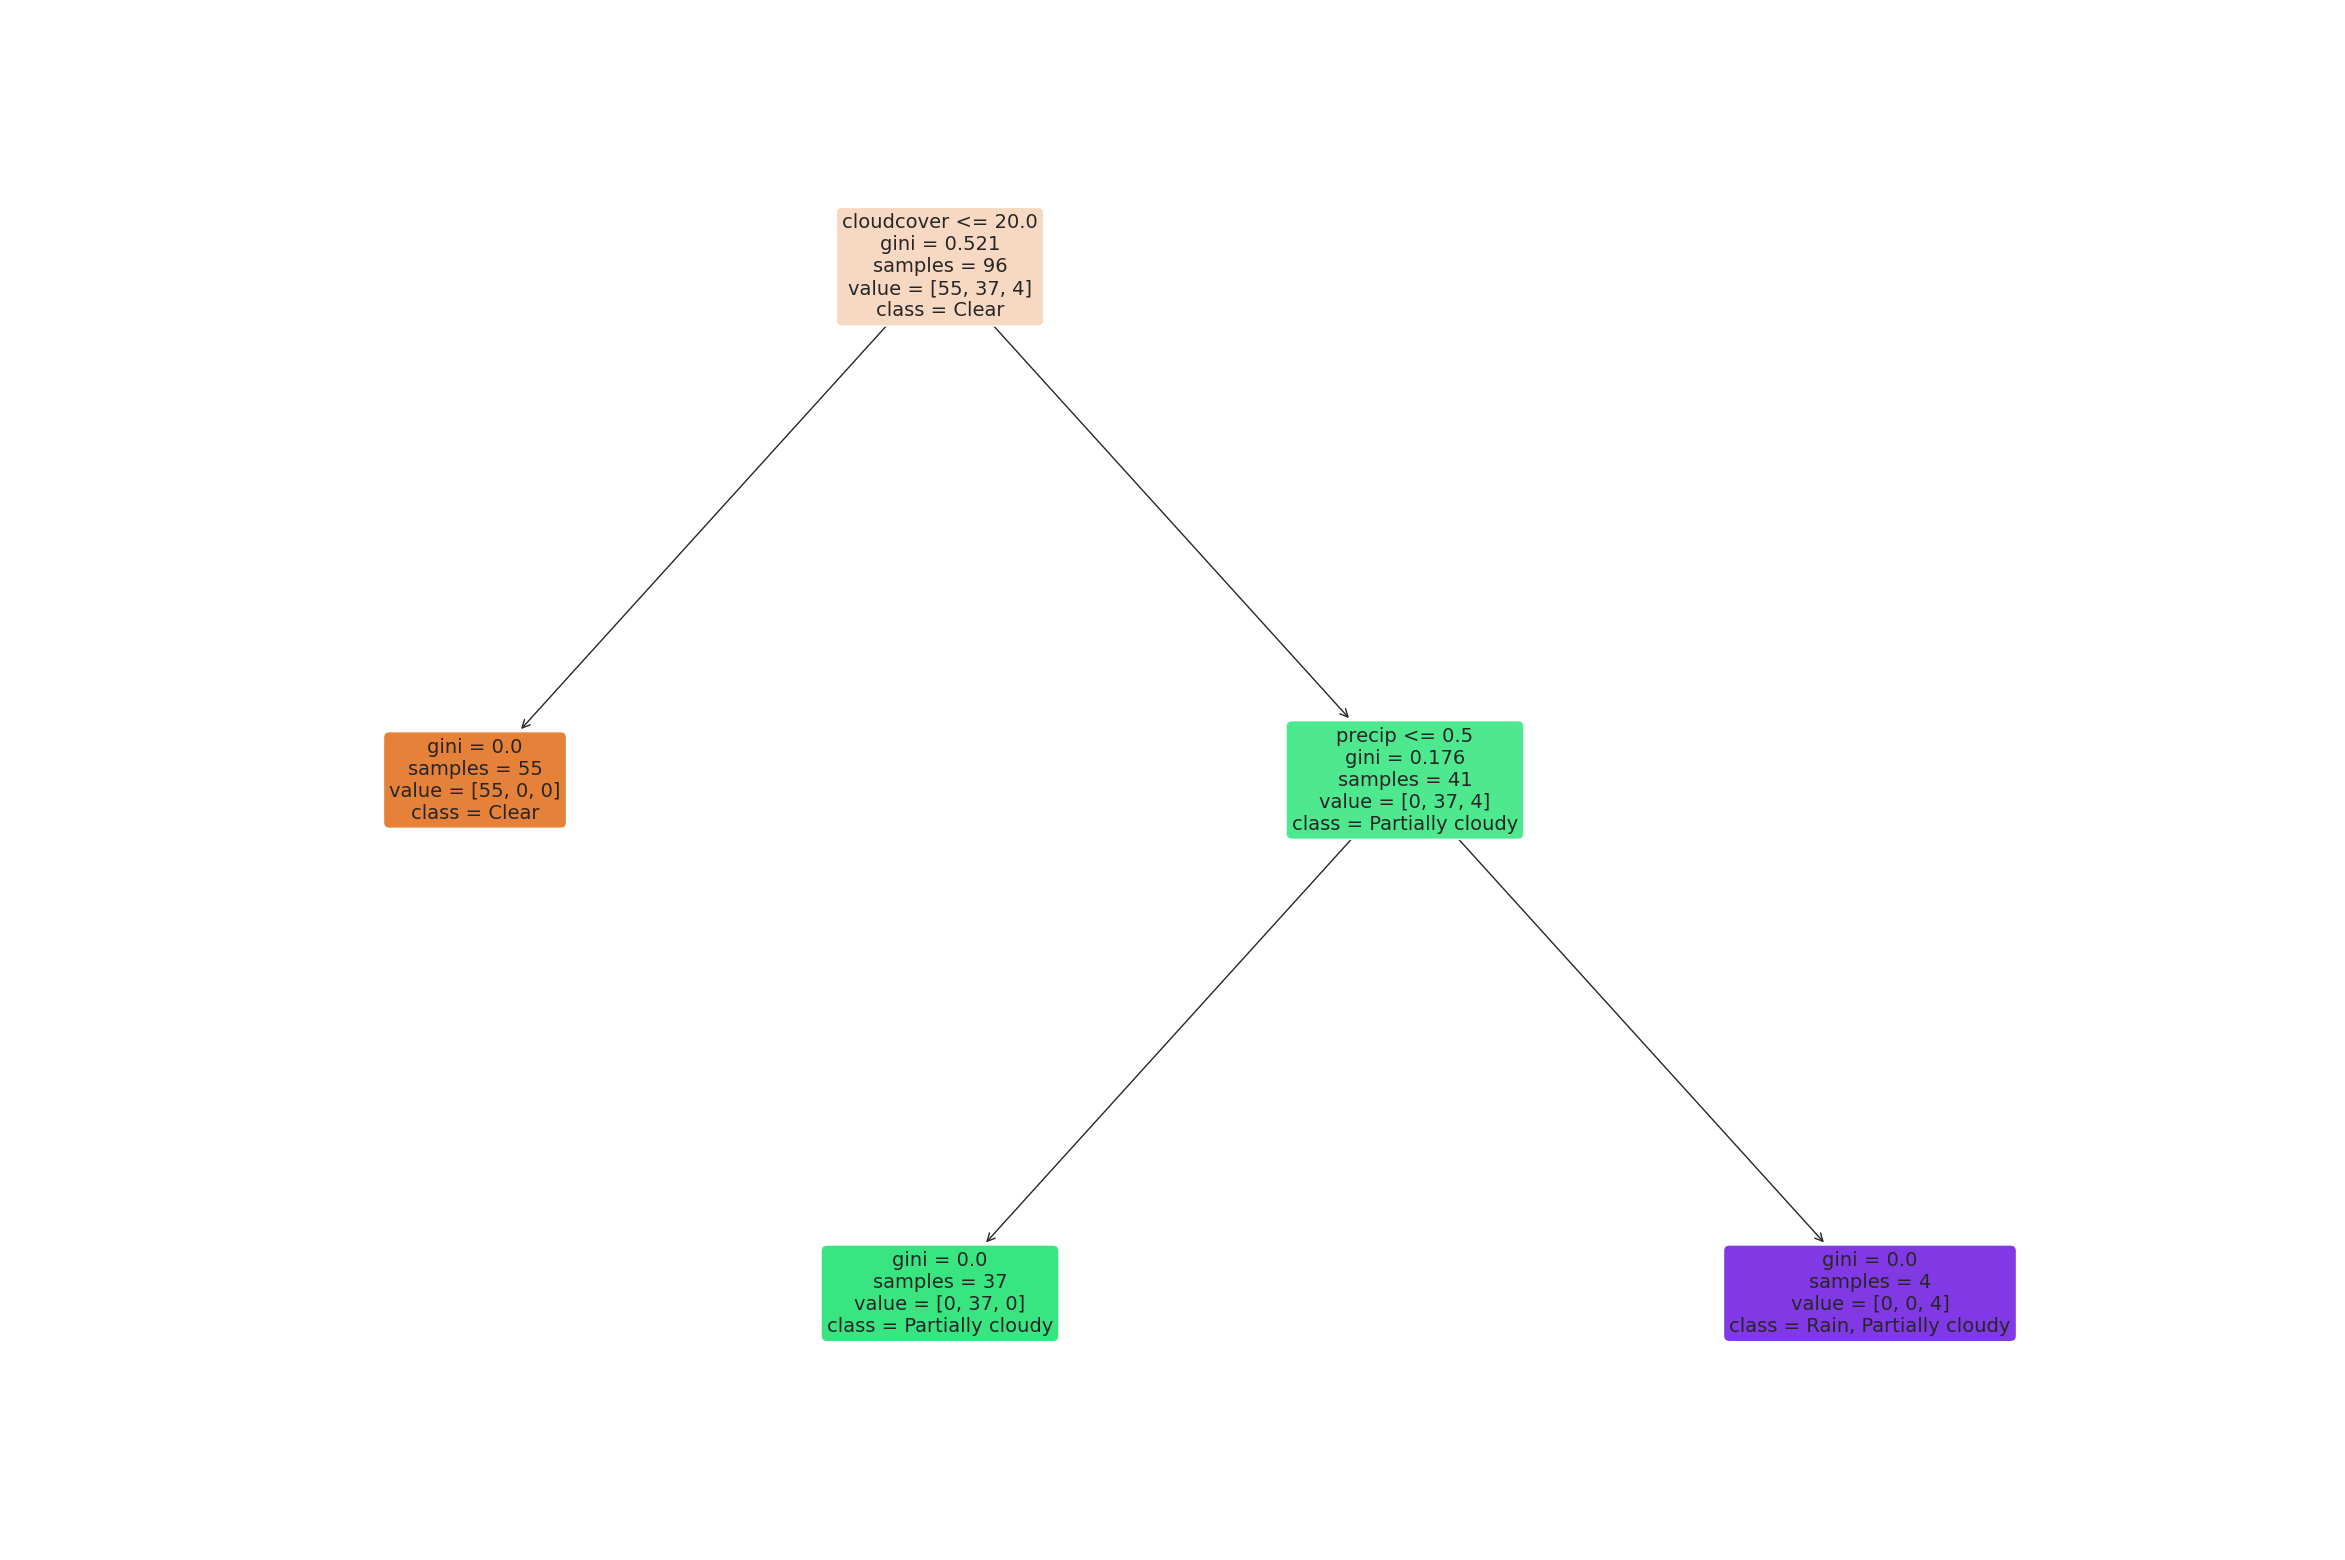

In [559]:
plt.figure(figsize=(30,20))
plot_tree(tree, feature_names = ['cloudcover','PM2.5','severerisk','uvindex','sealevelpressure','winddir','windspeed','precip','humidity','dew','temp'],class_names = val, rounded = True, filled = True, fontsize=14)
plt.show()

**CONCLUSION: DECISION TREE CLASSIFIER CAN BE USED TO PREDICT 'CONDITIONS' FROM WEATHER PARAMETERS. HOWEVER IT IS DIFFICULT TO PREDICT AQI VARIABLES WITH WEATHER PARAMETERS**